# Problem Statement

A bike-sharing system is a service in which bikes are made available for
shared use to individuals on a short term basis for a price or free. Many
bike share systems allow people to borrow a bike from a "dock" which is
usually computer-controlled wherein the user enters the payment
information, and the system unlocks it. This bike can then be returned to
another dock belonging to the same system.



**General Information:**
A US bike-sharing provider BoomBikes has recently suffered considerable
dips in their revenues due to the ongoing Corona pandemic. The company
is finding it very difficult to sustain in the current market scenario. So, it has
decided to come up with a mindful business plan to be able to accelerate
its revenue as soon as the ongoing lockdown comes to an end, and the
economy restores to a healthy state.


The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Dataset Info: data set is attached with the project file

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [379]:
bike=pd.read_csv('day.csv')

In [380]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [381]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [382]:
bike.shape

(730, 16)

In [383]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [384]:
#renaming the columns
bike.rename(columns={'dteday':'date','yr':'year','mnth':'month','temp':'temperature','atemp':'felt_temperature',
                     'hum':'humidity','casual':'casual_user','registered':'registered_user','cnt':'user'},inplace=True)

In [385]:
bike.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'felt_temperature',
       'humidity', 'windspeed', 'casual_user', 'registered_user', 'user'],
      dtype='object')

In [386]:
bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,felt_temperature,humidity,windspeed,casual_user,registered_user,user
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [387]:
#observe that casual_user+registered_user=total_count
#hence we can drop casual_user,registered_user and instant column
#we can also drop the date column since all the other other info. are given such as year, month etc.
#we can also drop 'instant' column as it is unnecessary

In [388]:
bike.drop(['instant','date','casual_user','registered_user'],axis=1,inplace=True)

In [389]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'felt_temperature', 'humidity',
       'windspeed', 'user'],
      dtype='object')

In [390]:
bike.isnull().sum()

season              0
year                0
month               0
holiday             0
weekday             0
workingday          0
weathersit          0
temperature         0
felt_temperature    0
humidity            0
windspeed           0
user                0
dtype: int64

<Axes: >

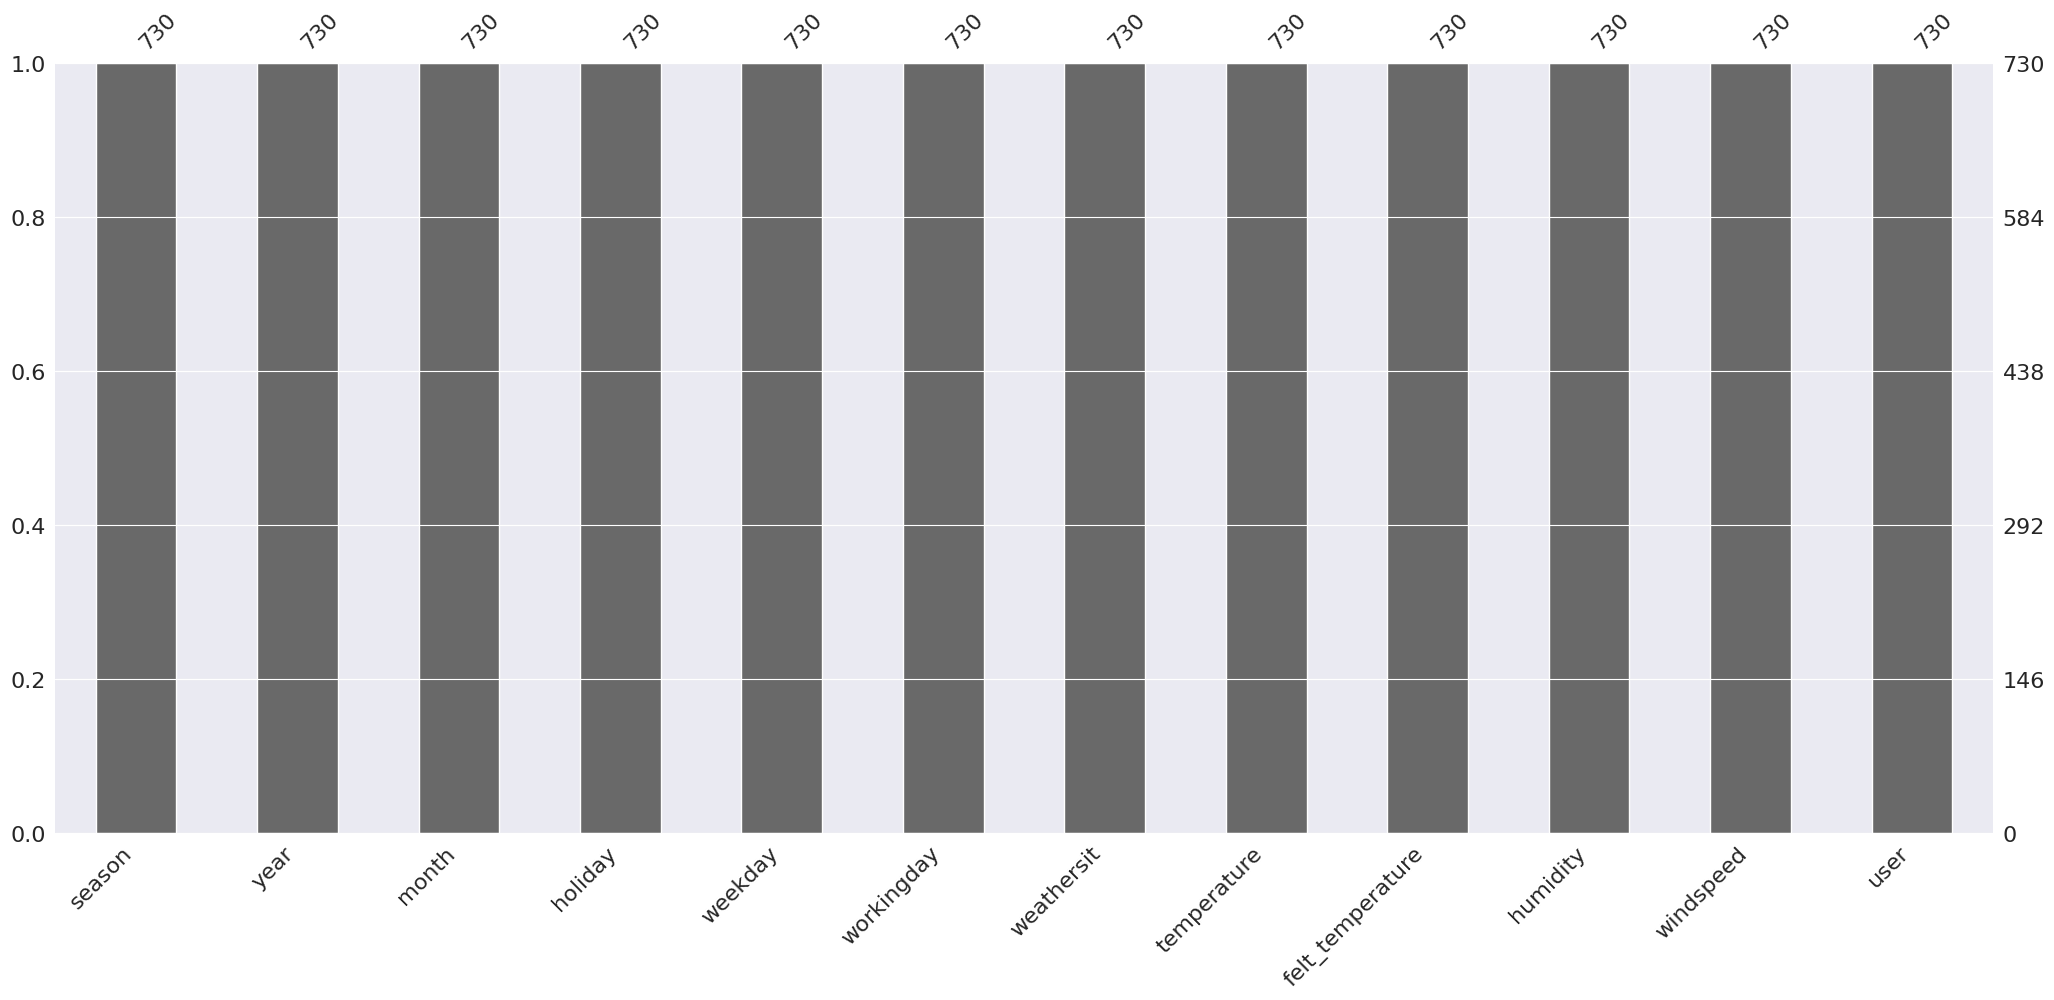

In [391]:
import missingno as msno
import pandas as pd
msno.bar(bike)

<Axes: >

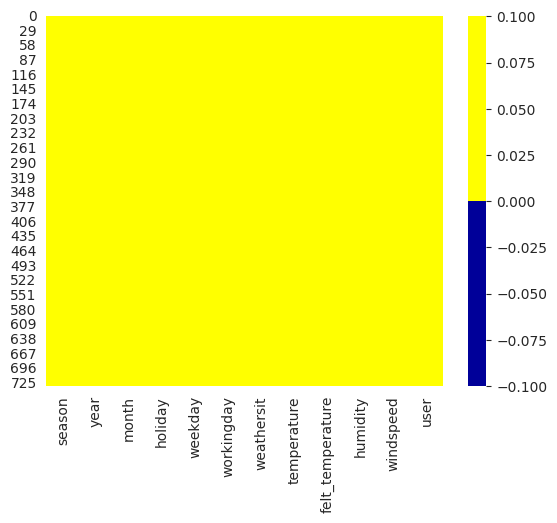

In [392]:
import seaborn as sns
cols = bike.columns 
colours = ['#000099', '#ffff00'] # specify the colours codes(google it) - yellow is missing. blue is not missing.
sns.heatmap(bike[cols].isnull(),
            cmap=sns.color_palette(colours)) 

In [393]:
bike.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [394]:
bike.duplicated().value_counts()

False    730
dtype: int64

In [395]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    int64  
 1   year              730 non-null    int64  
 2   month             730 non-null    int64  
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    int64  
 5   workingday        730 non-null    int64  
 6   weathersit        730 non-null    int64  
 7   temperature       730 non-null    float64
 8   felt_temperature  730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  user              730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [396]:
bike.nunique()

season                4
year                  2
month                12
holiday               2
weekday               7
workingday            2
weathersit            3
temperature         498
felt_temperature    689
humidity            594
windspeed           649
user                695
dtype: int64

In [397]:
#clearly some of them are of wrong data type

In [398]:
for i in ['season','year','month','holiday','weekday','workingday','weathersit']:
    bike[i]=bike[i].astype('object')

In [399]:
bike.dtypes

season               object
year                 object
month                object
holiday              object
weekday              object
workingday           object
weathersit           object
temperature         float64
felt_temperature    float64
humidity            float64
windspeed           float64
user                  int64
dtype: object

In [400]:
bike.describe()

,temperature,felt_temperature,humidity,windspeed,user
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [401]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'felt_temperature', 'humidity',
       'windspeed', 'user'],
      dtype='object')

# season column

In [402]:
bike['season'].unique()

array([1, 2, 3, 4], dtype=object)

In [403]:
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [404]:
seasons={1:'spring',2:'summer',3:'fall',4:'winter'}
def Season(x):
    return x.map(seasons)


In [405]:
bike[['season']]=bike[['season']].apply(Season)

In [406]:
bike.dtypes

season               object
year                 object
month                object
holiday              object
weekday              object
workingday           object
weathersit           object
temperature         float64
felt_temperature    float64
humidity            float64
windspeed           float64
user                  int64
dtype: object

In [407]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

# month column

In [408]:
bike['month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object)

In [409]:
bike['month'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [410]:
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month'] = bike['month'].map(months)


In [411]:
bike['month'].value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: month, dtype: int64

## weekday

In [412]:
bike['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=object)

In [413]:
bike['weekday'].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [414]:
def Weekday(x):
    return x.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',
                 5:'Friday',6:'Saturday'})

In [415]:
bike[['weekday']] = bike[['weekday']].apply(Weekday)

In [416]:
bike['weekday'].value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thrusday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

## weathersit

In [417]:
bike['weathersit'].unique()

array([2, 1, 3], dtype=object)

In [418]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [419]:
def Weather(x):
    return x.map({1:'clear+partly cloudy',2:'mist+cloudy',3:'light+rain+snow'})

In [420]:
bike[['weathersit']]=bike[['weathersit']].apply(Weather)

In [421]:
bike['weathersit'].value_counts()

clear+partly cloudy    463
mist+cloudy            246
light+rain+snow         21
Name: weathersit, dtype: int64

In [422]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    object 
 2   month             730 non-null    object 
 3   holiday           730 non-null    object 
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    object 
 6   weathersit        730 non-null    object 
 7   temperature       730 non-null    float64
 8   felt_temperature  730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  user              730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [423]:
# define numerical & categorical columns
categorical_features=[i for i in bike.columns if bike[i].dtype == 'O']

numerical_features=[i for i in bike.columns if bike[i].dtype != 'O']


print('we have {} numerical features: '.format(len(numerical_features)),numerical_features)

print(f'we have {len(categorical_features)} catagorical feature : {categorical_features}')

we have 5 numerical features:  ['temperature', 'felt_temperature', 'humidity', 'windspeed', 'user']
we have 7 catagorical feature : ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']


In [424]:
bike.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,felt_temperature,humidity,windspeed,user
0,spring,0,Jan,0,Monday,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear+partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrusday,1,clear+partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear+partly cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Saturday,0,clear+partly cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sunday,0,mist+cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Monday,1,mist+cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tuesday,1,clear+partly cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wednesday,1,clear+partly cloudy,6.184153,7.54440,48.2917,14.958889,1321


In [425]:
bike.describe().columns

Index(['temperature', 'felt_temperature', 'humidity', 'windspeed', 'user'], dtype='object')

# Visualization
  ## numerical data

In [426]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## histogram

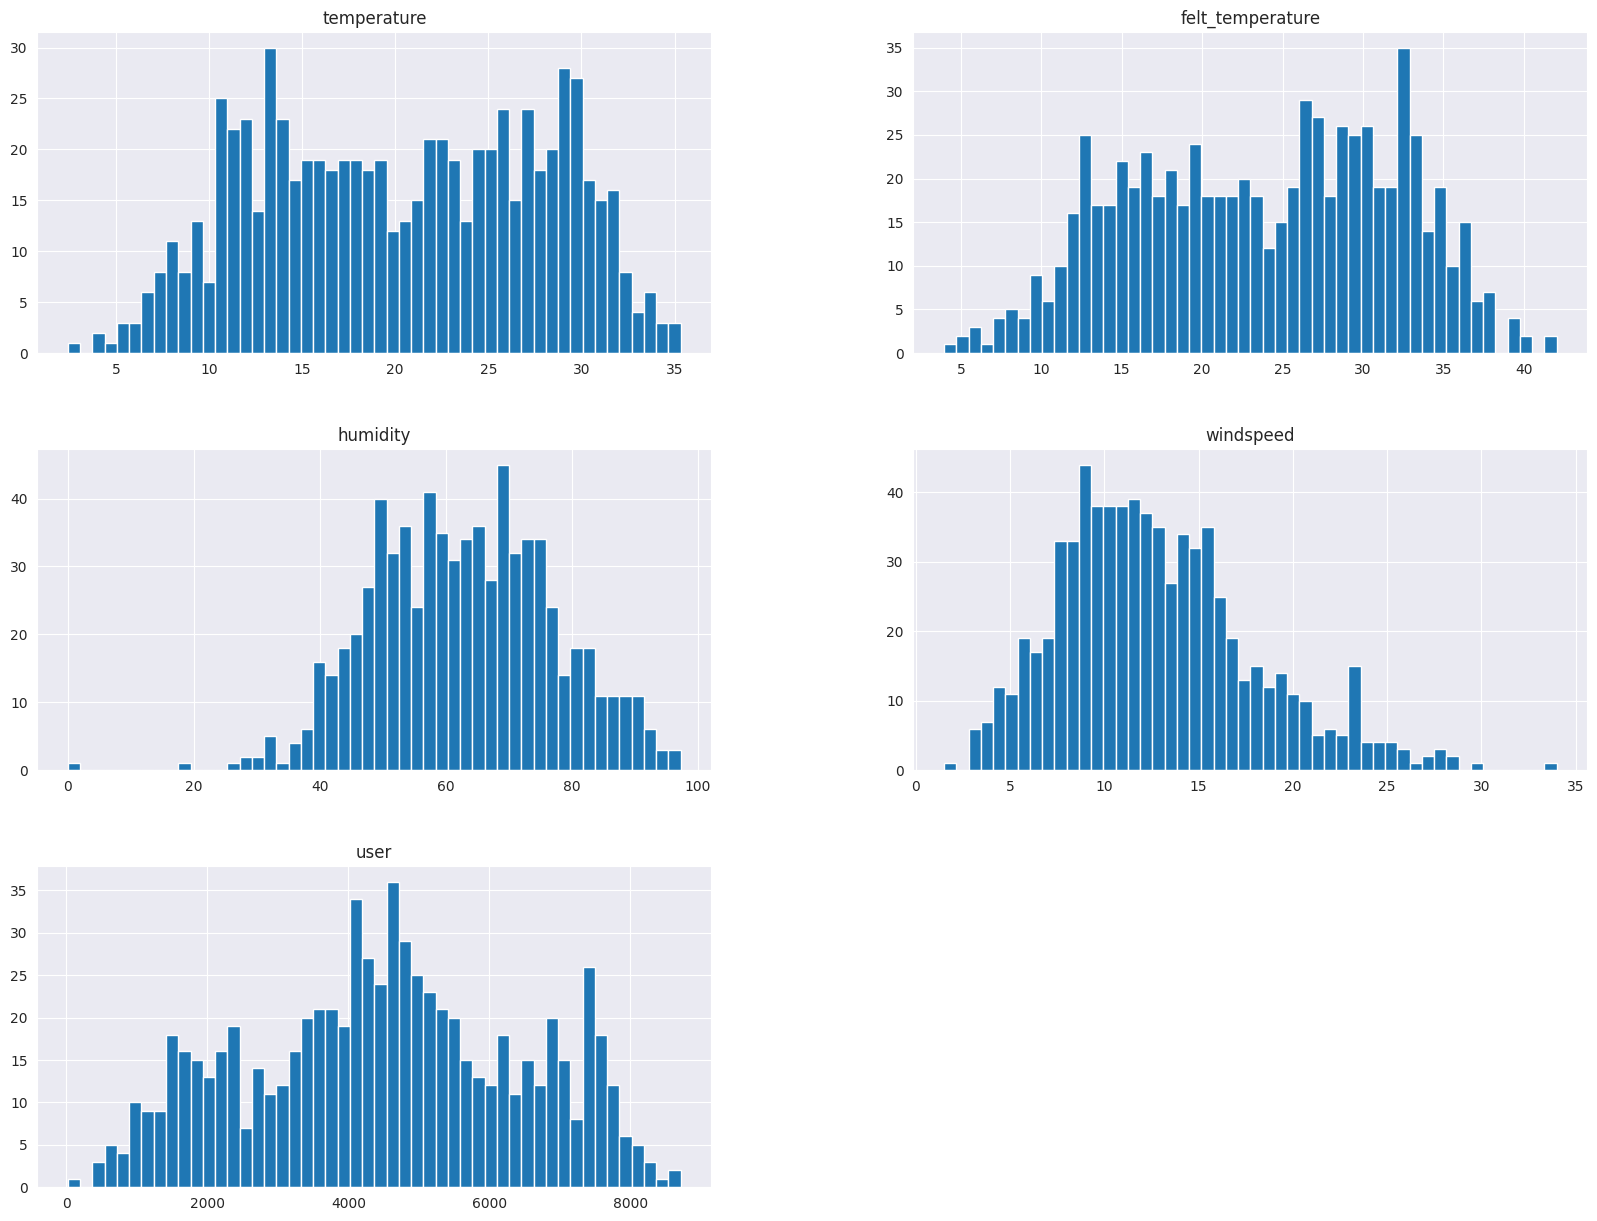

In [427]:
bike.hist(bins=50,figsize=(20,15))
plt.show()

## distplot

In [428]:
numerical_features

['temperature', 'felt_temperature', 'humidity', 'windspeed', 'user']

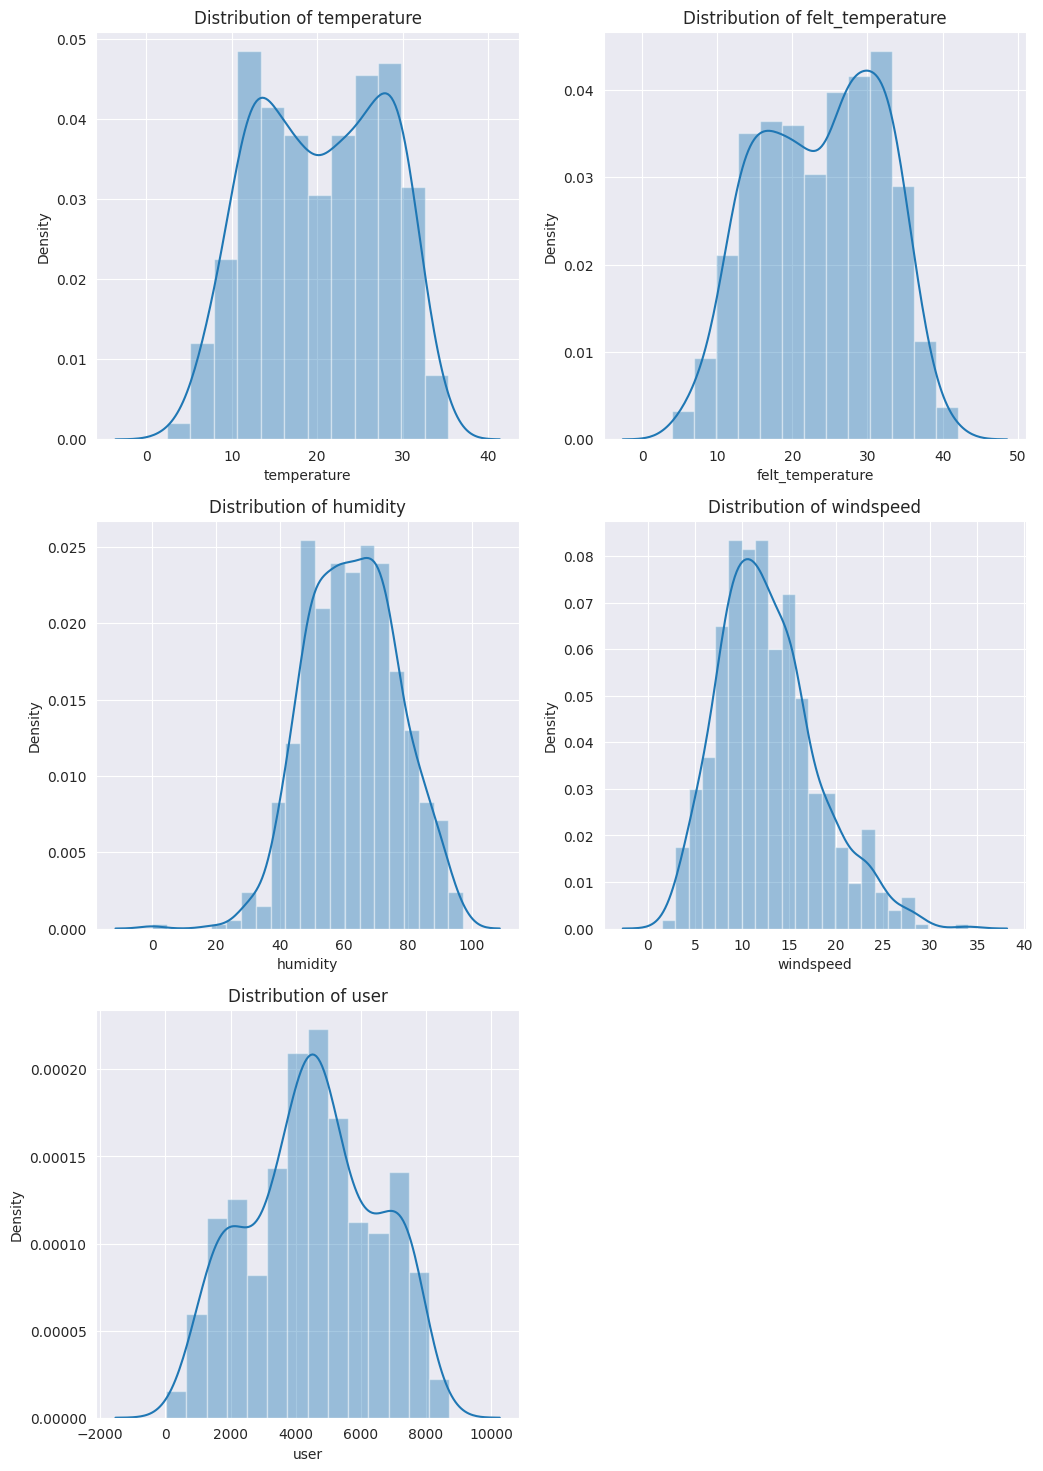

In [429]:
x=['temperature', 'felt_temperature', 'humidity', 'windspeed', 'user']
plt.figure(figsize=(12,18))
for i,v in enumerate(x):
    plt.subplot(3,2,i+1)
    sns.distplot(bike[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
plt.show()

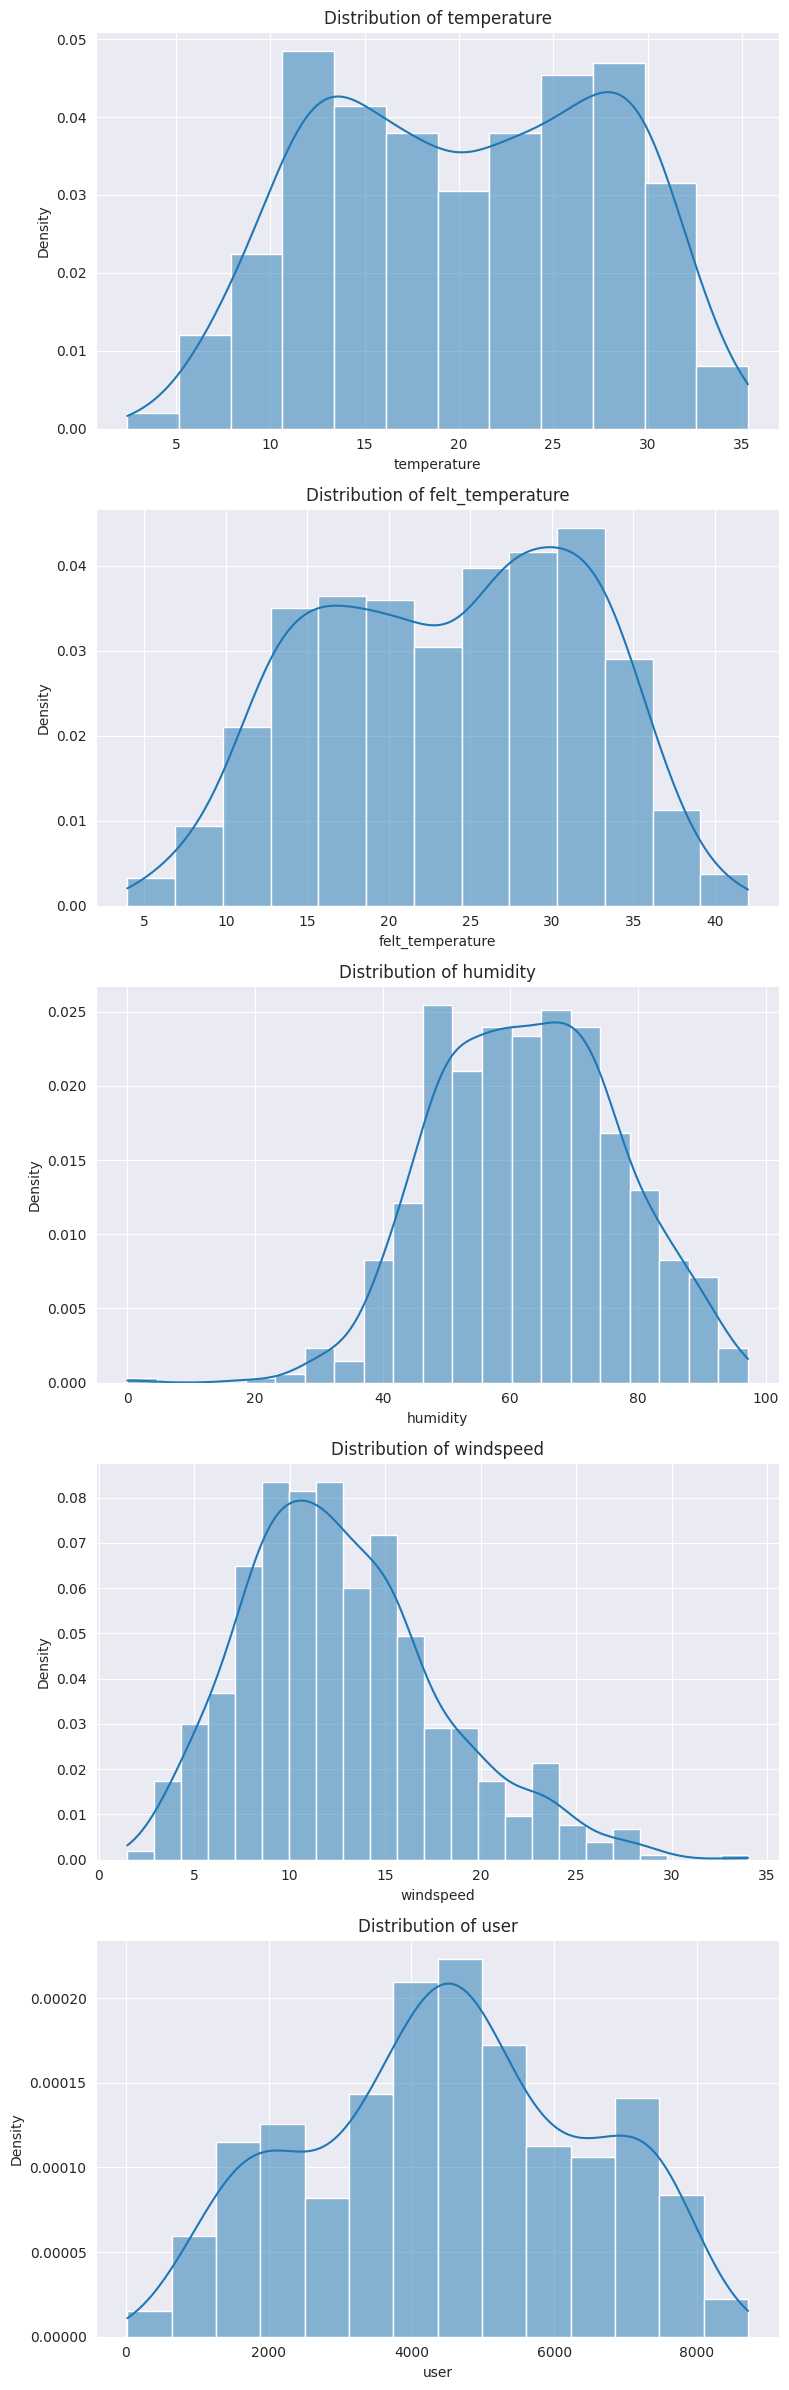

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "bike" is the name of your dataframe
num_vars = bike.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(num_vars), figsize=(8,24))
for i, var in enumerate(num_vars):
    sns.histplot(data=bike, x=var, kde=True, ax=axes[i], stat="density")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

## pairplot

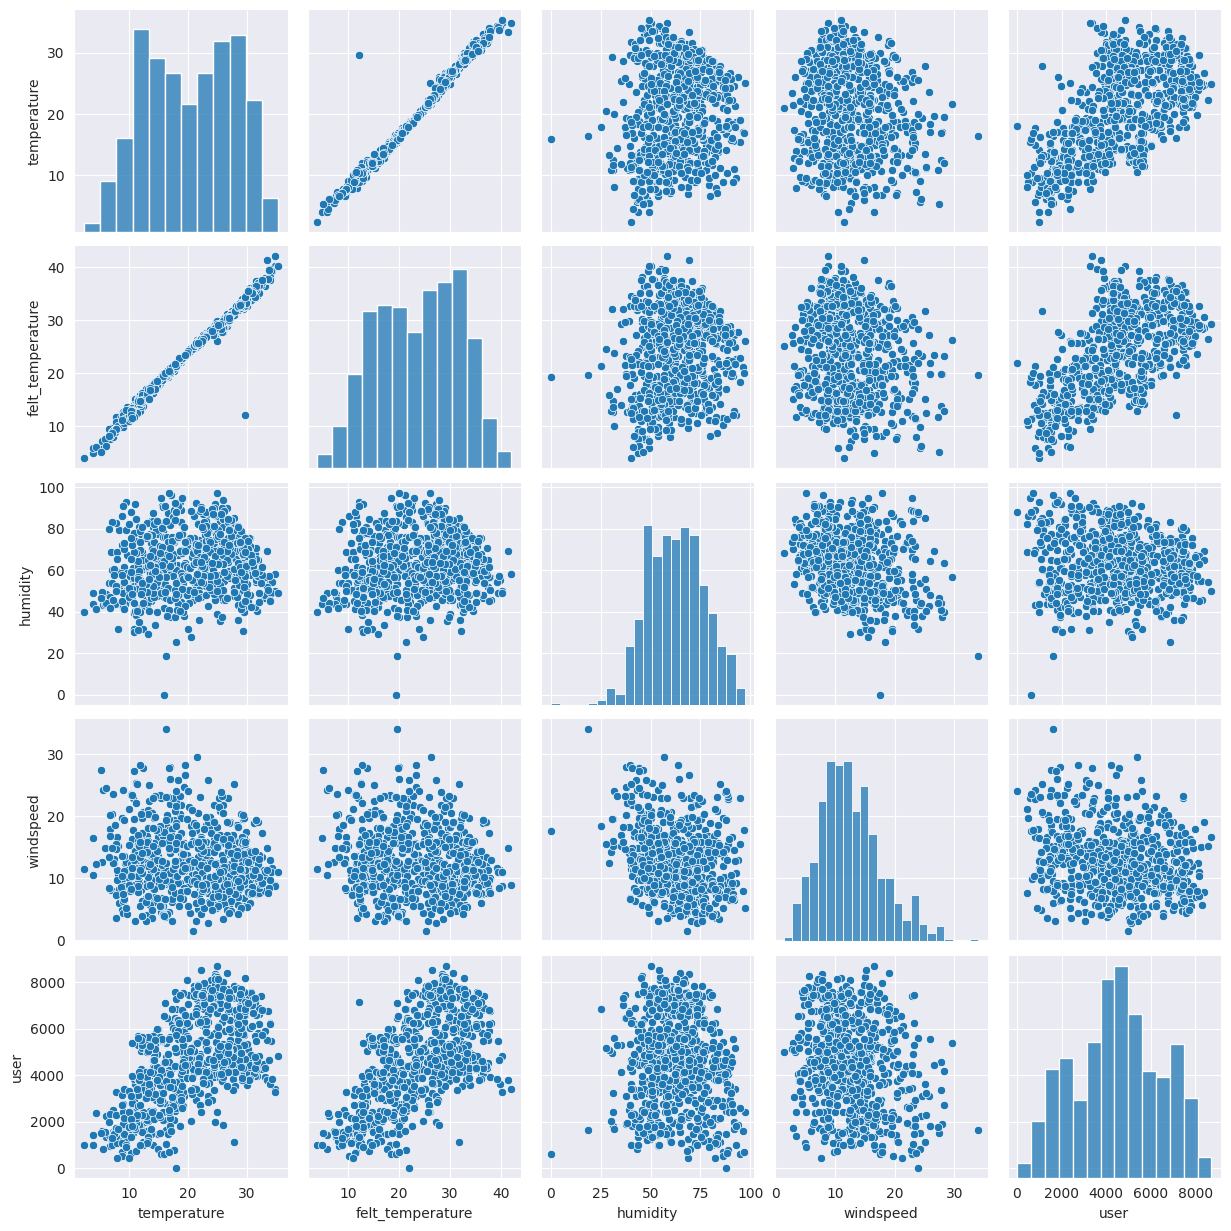

In [431]:
x = list(bike.describe().columns)
sns.pairplot(bike, vars=x)
plt.show()

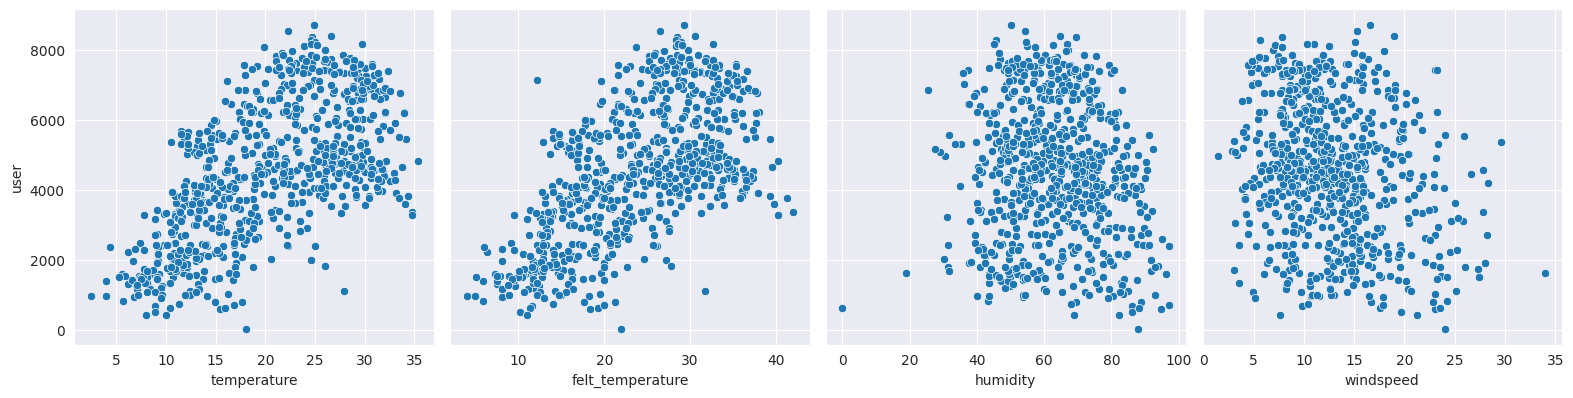

In [432]:
sns.pairplot(bike, x_vars=['temperature','felt_temperature','humidity','windspeed'], y_vars='user',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()


In [433]:
#Lineplot

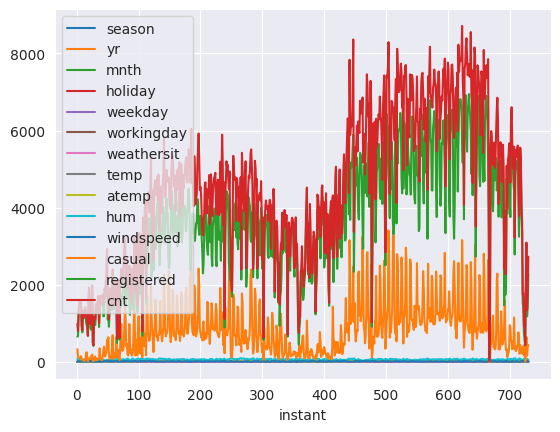

In [434]:
from matplotlib import pyplot
import pandas as pd
series =pd.read_csv('day.csv', header=0, index_col=0,parse_dates=True)
series.plot()
pyplot.show()

In [435]:
#pie chart

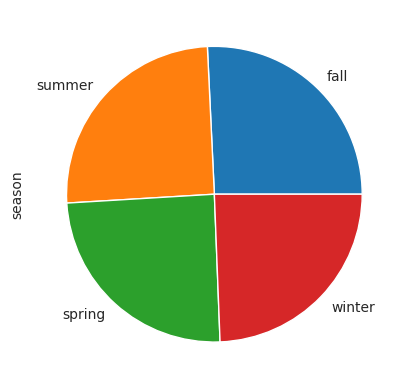

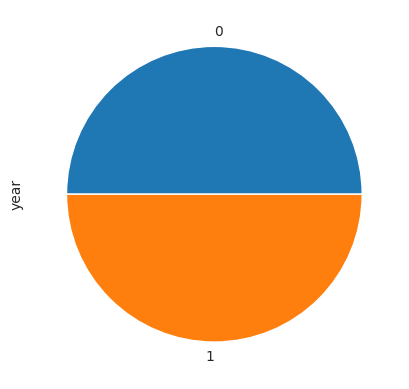

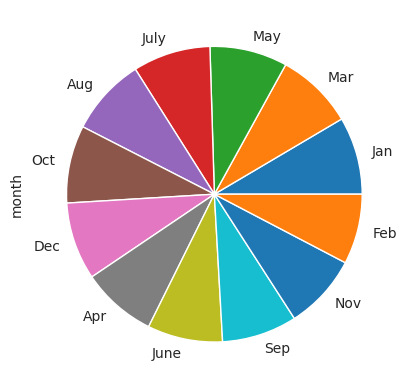

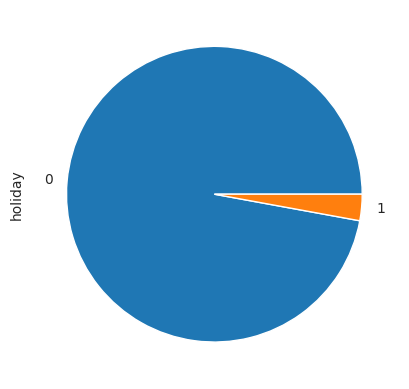

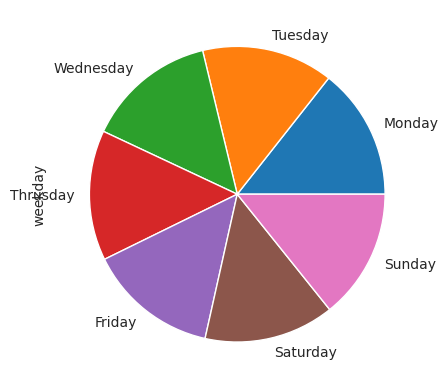

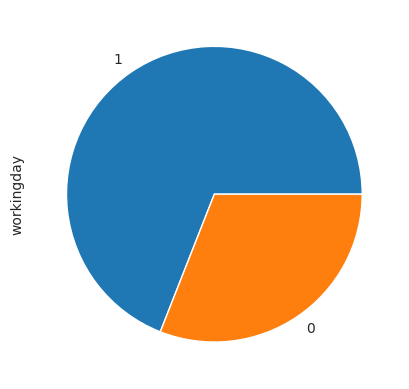

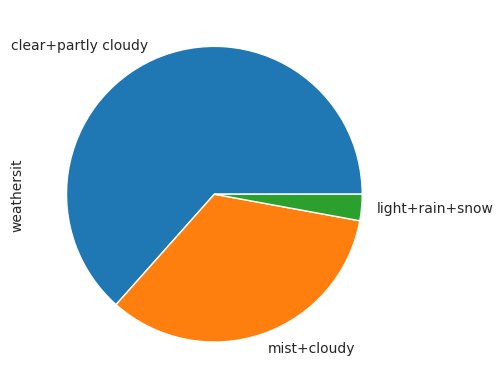

In [436]:
for i in ['season','year','month','holiday','weekday','workingday','weathersit']:
    bike[i].value_counts().plot.pie()
    plt.show(block=False)

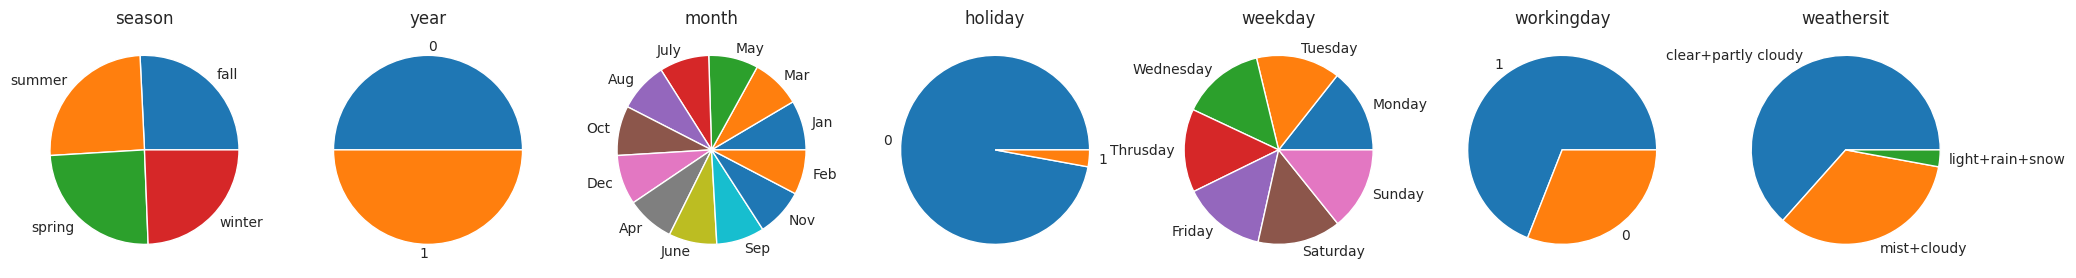

In [437]:
import pandas as pd
import matplotlib.pyplot as plt



# get a list of categorical columns
columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

# create subplots with len(columns) columns and one row
fig, axs = plt.subplots(1, len(columns), figsize=(25, 10))

# loop through each categorical column and create a pie chart
for i, col in enumerate(columns):
    # get the count of each unique value in the column
    value_counts = bike[col].value_counts()
    # create a pie chart with the counts
    axs[i].pie(value_counts, labels=value_counts.index.tolist())
    # set the title of the chart to the column name
    axs[i].set_title(col)

# adjust the spacing between subplots
fig.subplots_adjust(wspace=0.2)

# show the plot
plt.show()


## barplot

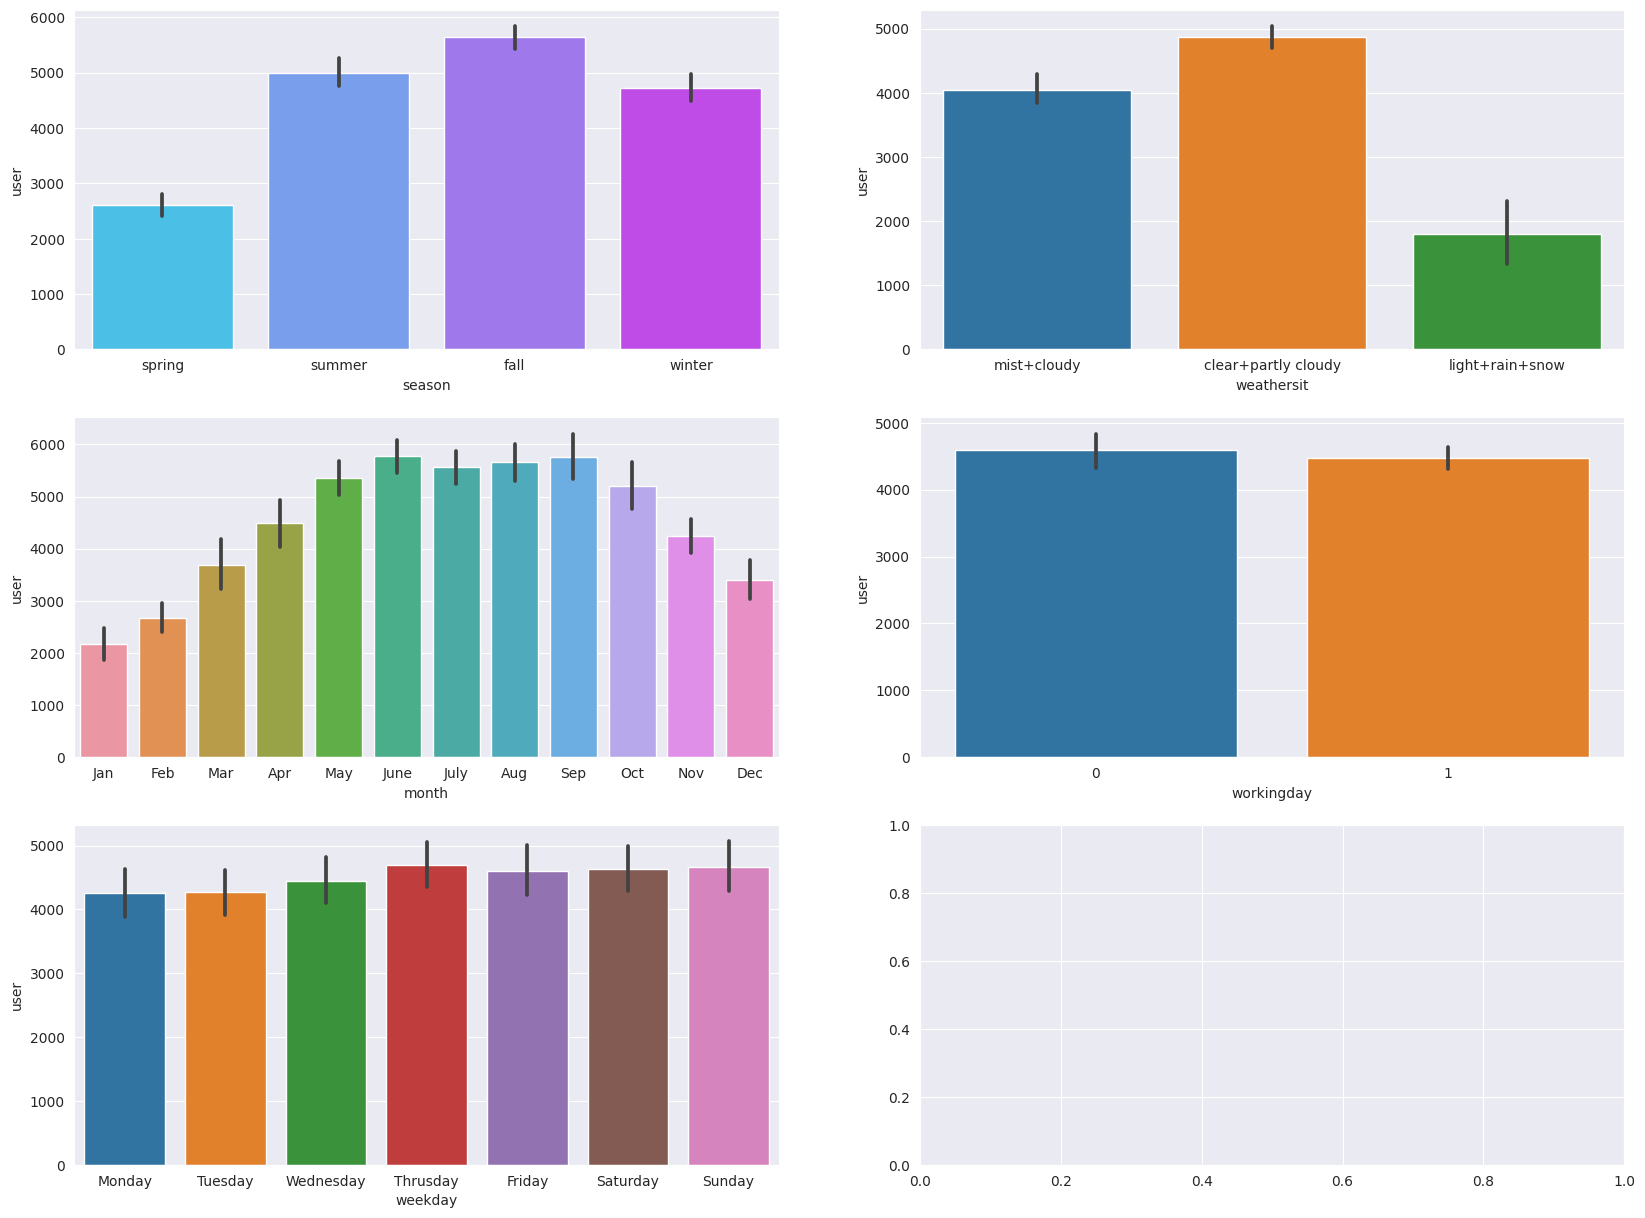

In [438]:
fig, axes = plt.subplots(3, 2, figsize = (20,15))
sns.set_style('whitegrid')
#create chart in each subplot
sns.barplot(data=bike, x='season', y='user',palette='cool', ax=axes[0,0])
sns.barplot(data=bike, x='weathersit', y='user', ax=axes[0,1])
sns.barplot(data=bike, x='month', y='user', ax=axes[1,0])
sns.barplot(data=bike, x='workingday', y='user', ax=axes[1,1])
sns.barplot(data=bike, x='weekday', y='user', ax=axes[2,0])

plt.show()

## boxplot


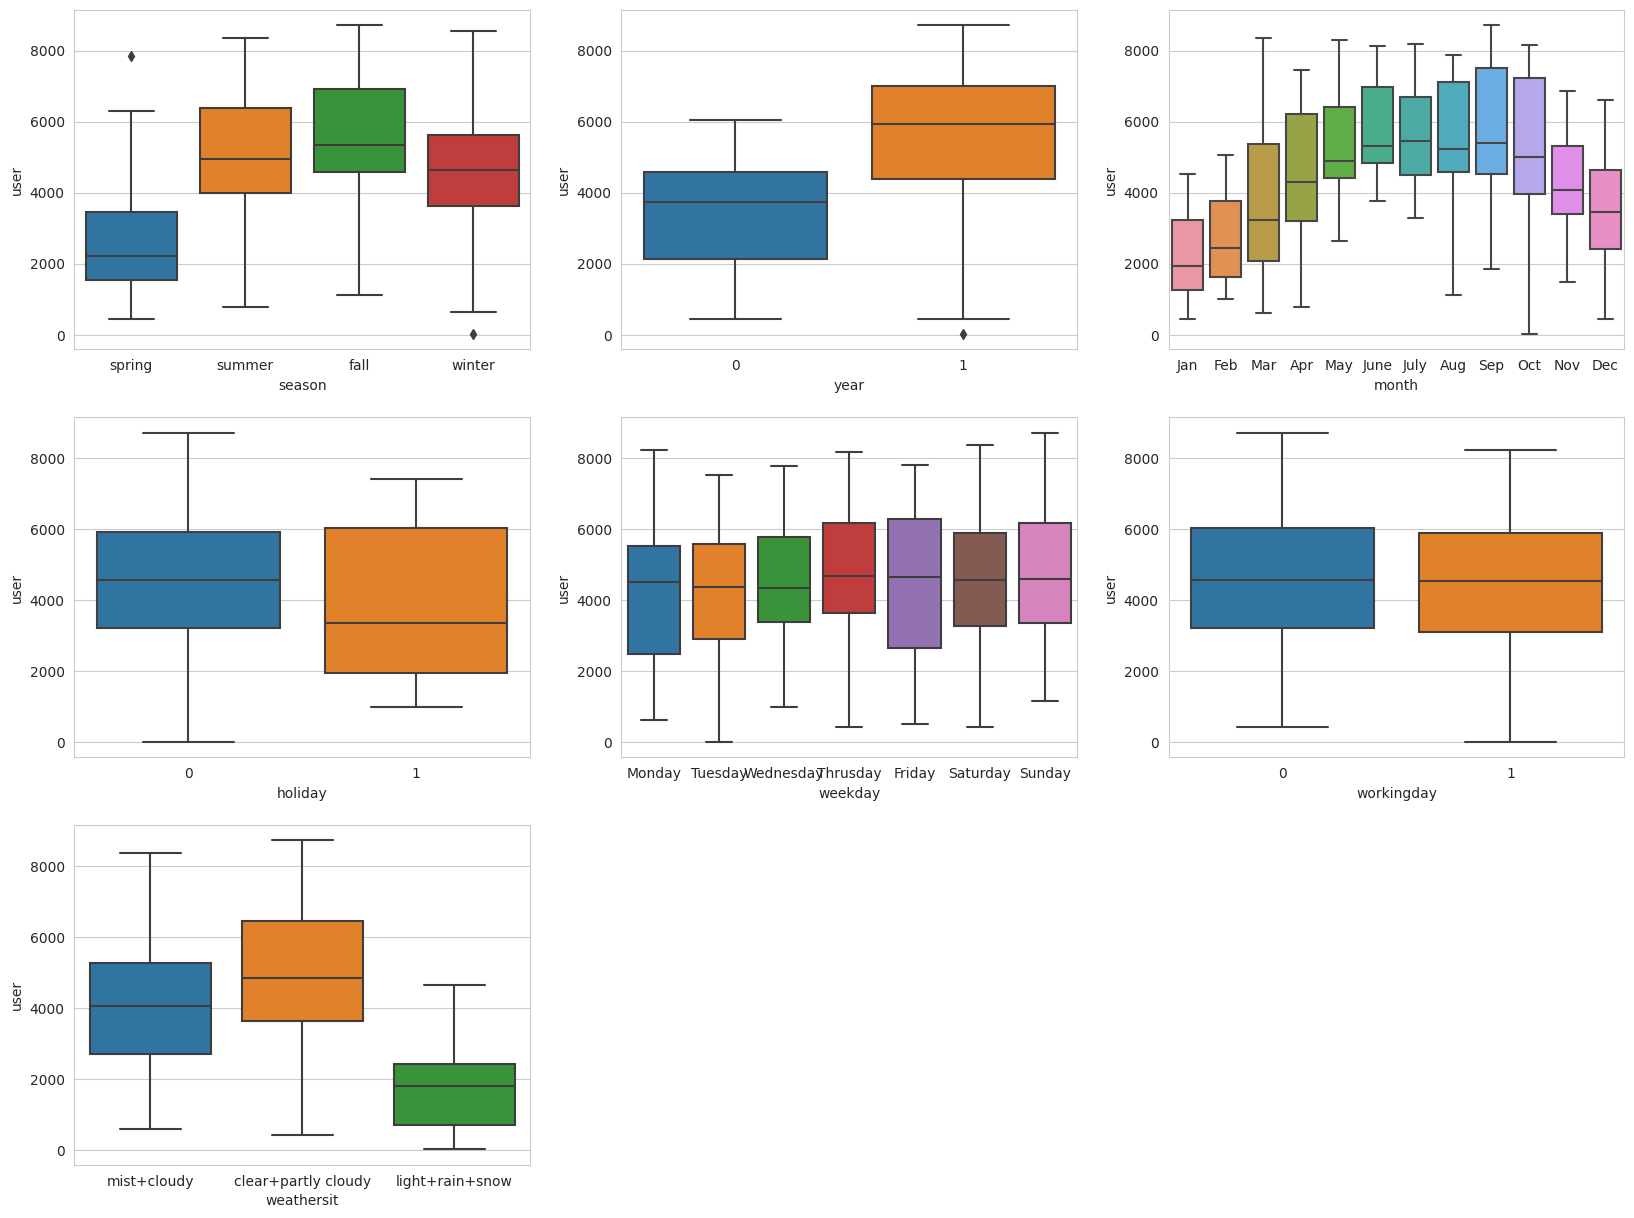

In [439]:
plt.figure(figsize=[20,15])
counter = 1
for i in ['season','year','month','holiday','weekday','workingday','weathersit']:
    plt.subplot(3,3,counter)
    sns.boxplot(x=i, y='user', data=bike)
    counter +=1

## bi variable analysis

In [440]:
#season column

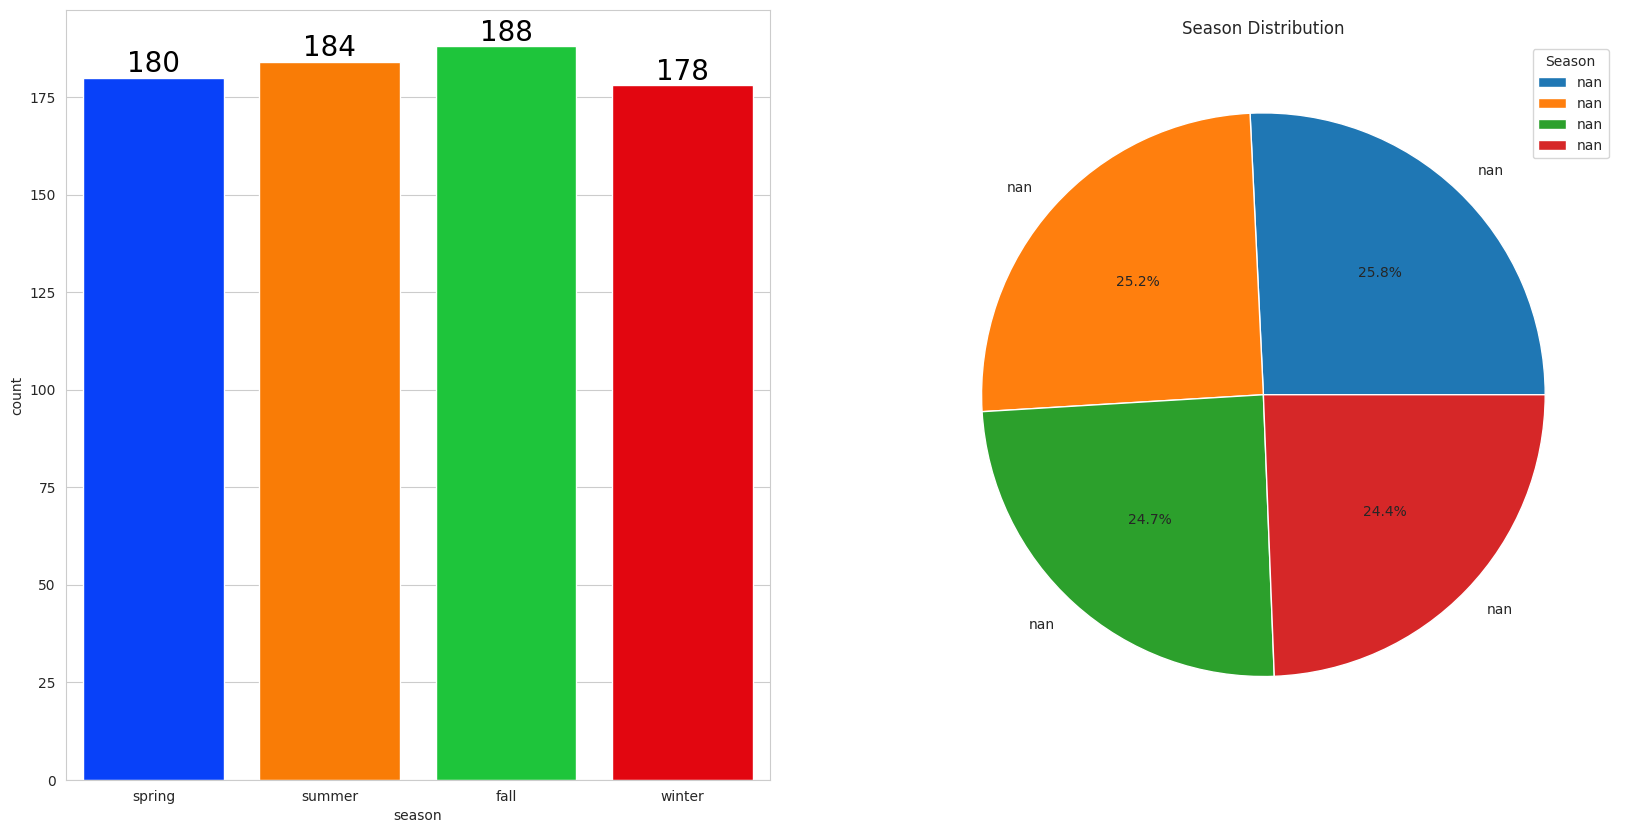

In [441]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=bike['season'],data=bike,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_counts = bike['season'].value_counts()
season_counts.index = season_counts.index.map(season_names)
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%')
plt.title('Season Distribution')
plt.legend(title='Season', loc='upper right')
plt.show(block=False)


In [442]:
#year

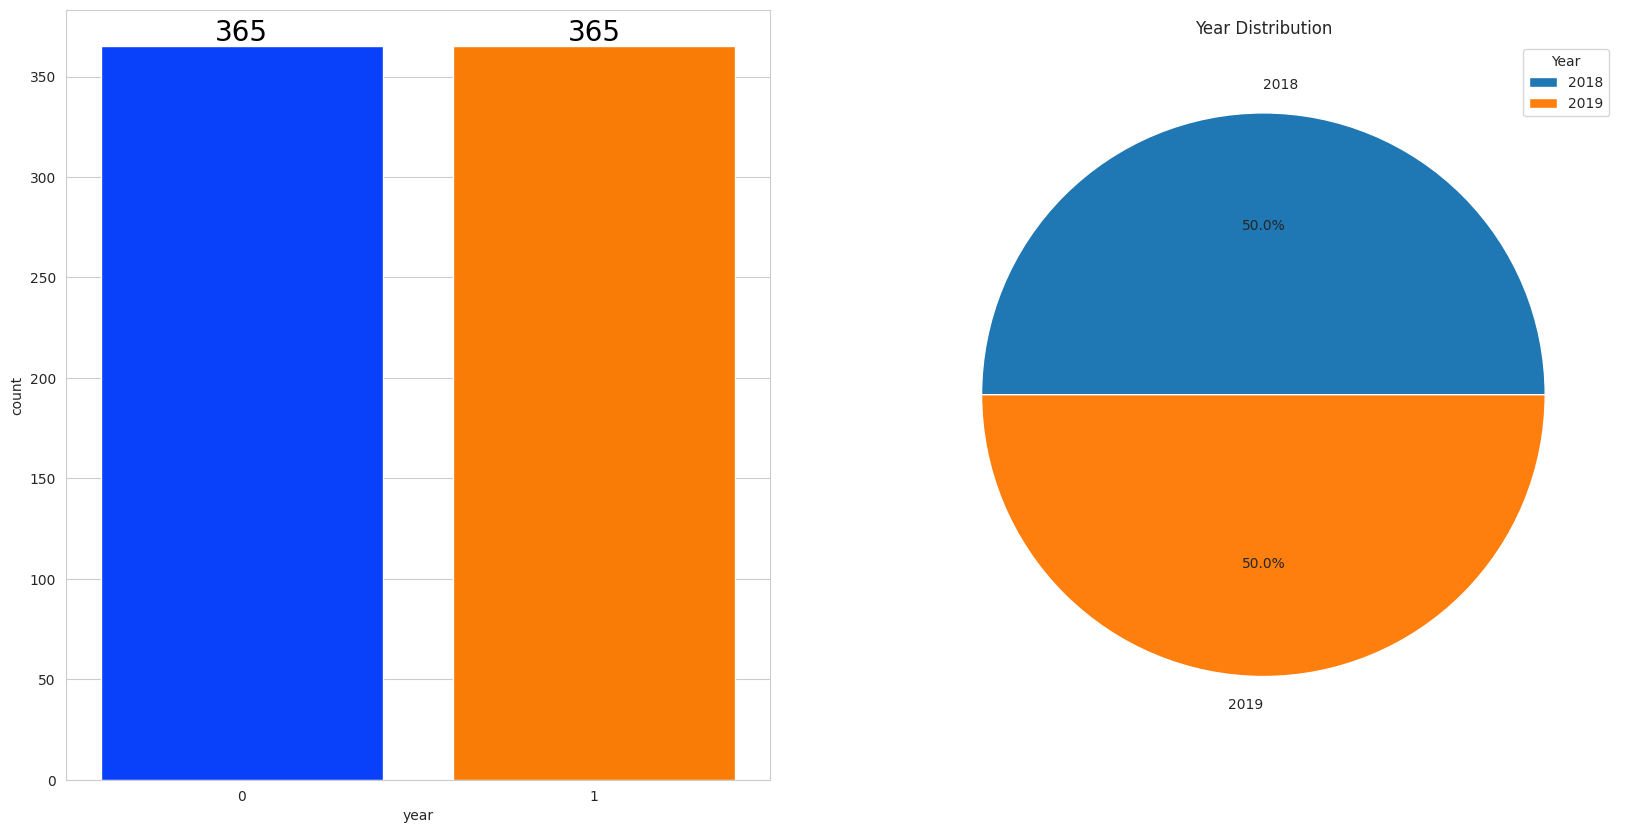

In [443]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=bike['year'],data=bike,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

year_name = {0: 2018,1 : 2019}
year_counts = bike['year'].value_counts()
year_counts.index = year_counts.index.map(year_name)
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.title('Year Distribution')
plt.legend(title='Year', loc='upper right')
plt.show(block=False)


In [444]:
#month

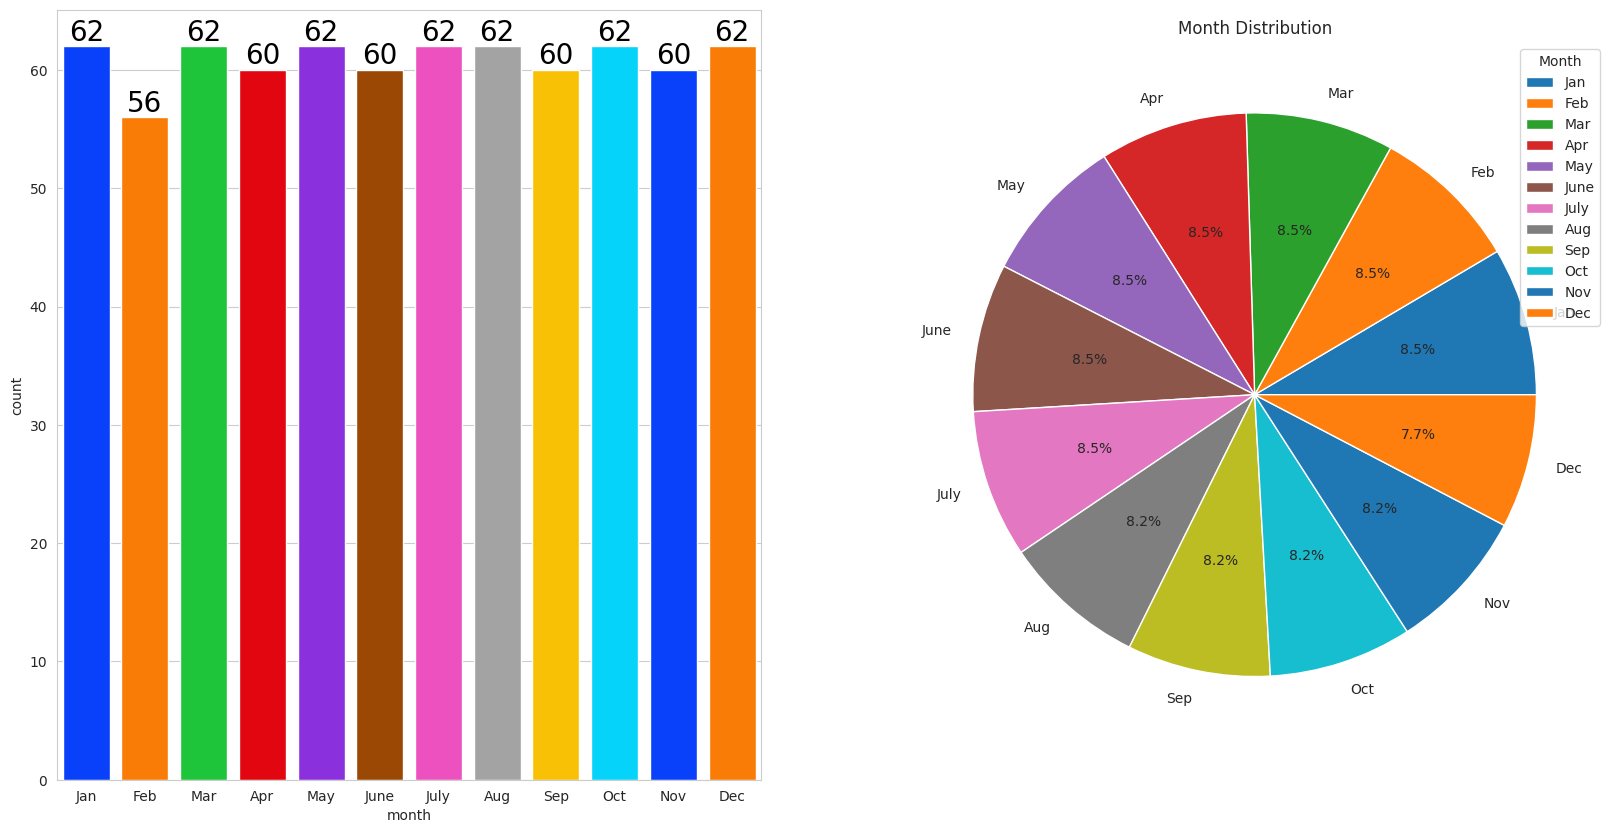

In [445]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=bike['month'],data=bike,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

# Define a dictionary to map month numbers to their names
month_name = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Create a new pandas Series object with month names as index and fill missing values with 0
month_counts = bike['month'].value_counts()
all_months = pd.Series(month_counts.values, index=month_name.values()).fillna(0)

# Create a pie chart with labels
plt.pie(all_months, labels=all_months.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Month Distribution')

# Add a legend to the chart
plt.legend(title='Month', loc='upper right')

# Display the chart
plt.show(block=False)

In [446]:
#holiday

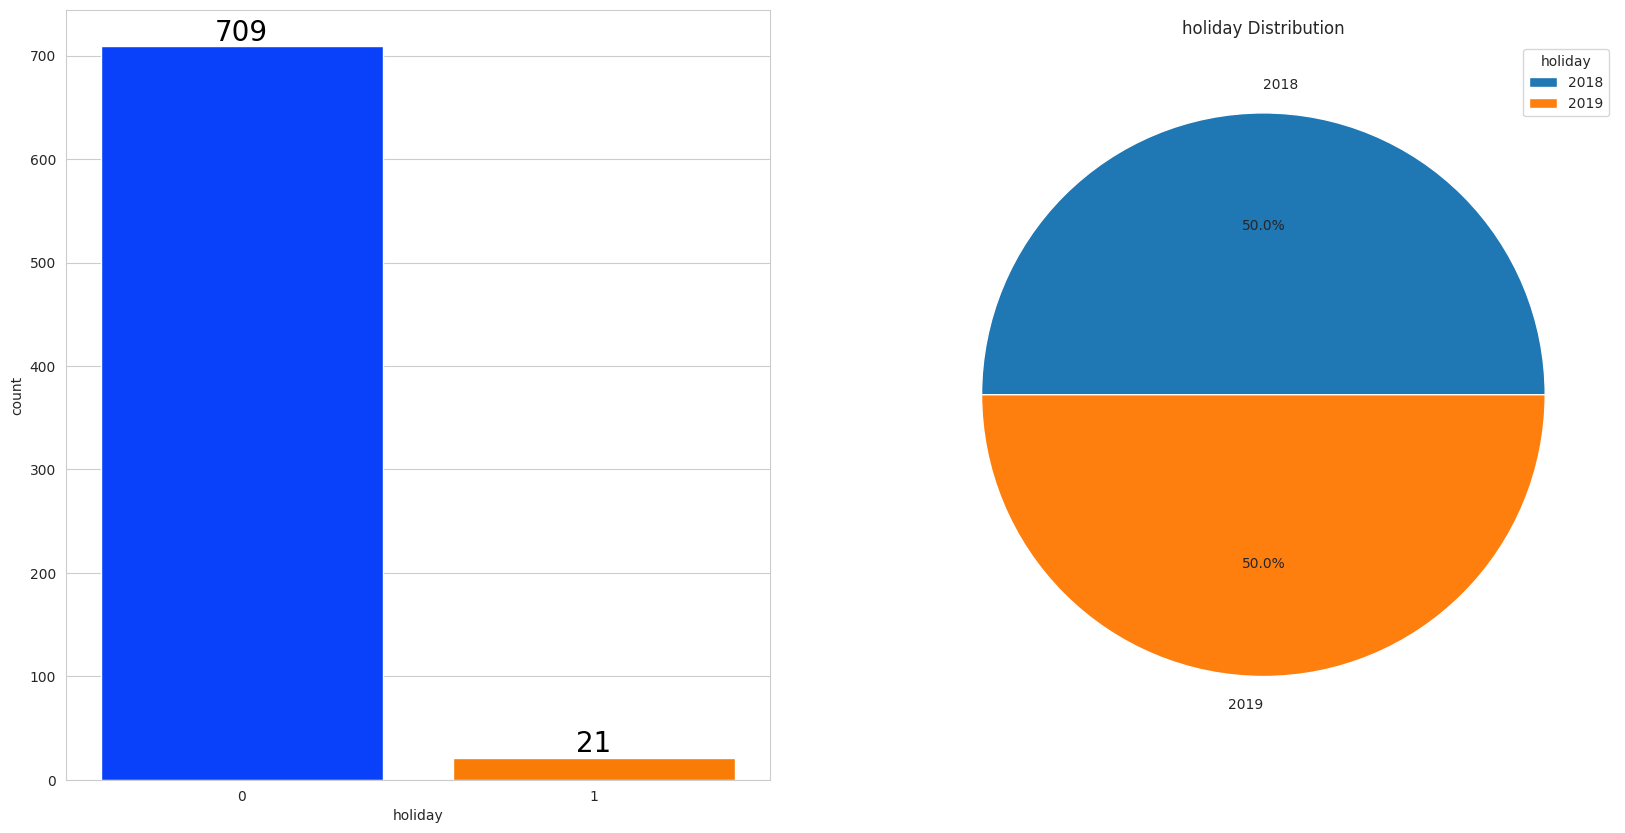

In [447]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=bike['holiday'],data=bike,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

holiday_name = {0: 2018,1 : 2019}
holiday_counts = bike['holiday'].value_counts()
holiday_counts.index = holiday_counts.index.map(year_name)
plt.pie(year_counts, labels=holiday_counts.index, autopct='%1.1f%%')
plt.title('holiday Distribution')
plt.legend(title='holiday', loc='upper right')
plt.show(block=False)

In [448]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    object 
 2   month             730 non-null    object 
 3   holiday           730 non-null    object 
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    object 
 6   weathersit        730 non-null    object 
 7   temperature       730 non-null    float64
 8   felt_temperature  730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  user              730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [449]:
bike.nunique()

season                4
year                  2
month                12
holiday               2
weekday               7
workingday            2
weathersit            3
temperature         498
felt_temperature    689
humidity            594
windspeed           649
user                695
dtype: int64

In [450]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,felt_temperature,humidity,windspeed,user
0,spring,0,Jan,0,Monday,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear+partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrusday,1,clear+partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear+partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [451]:
#weekday

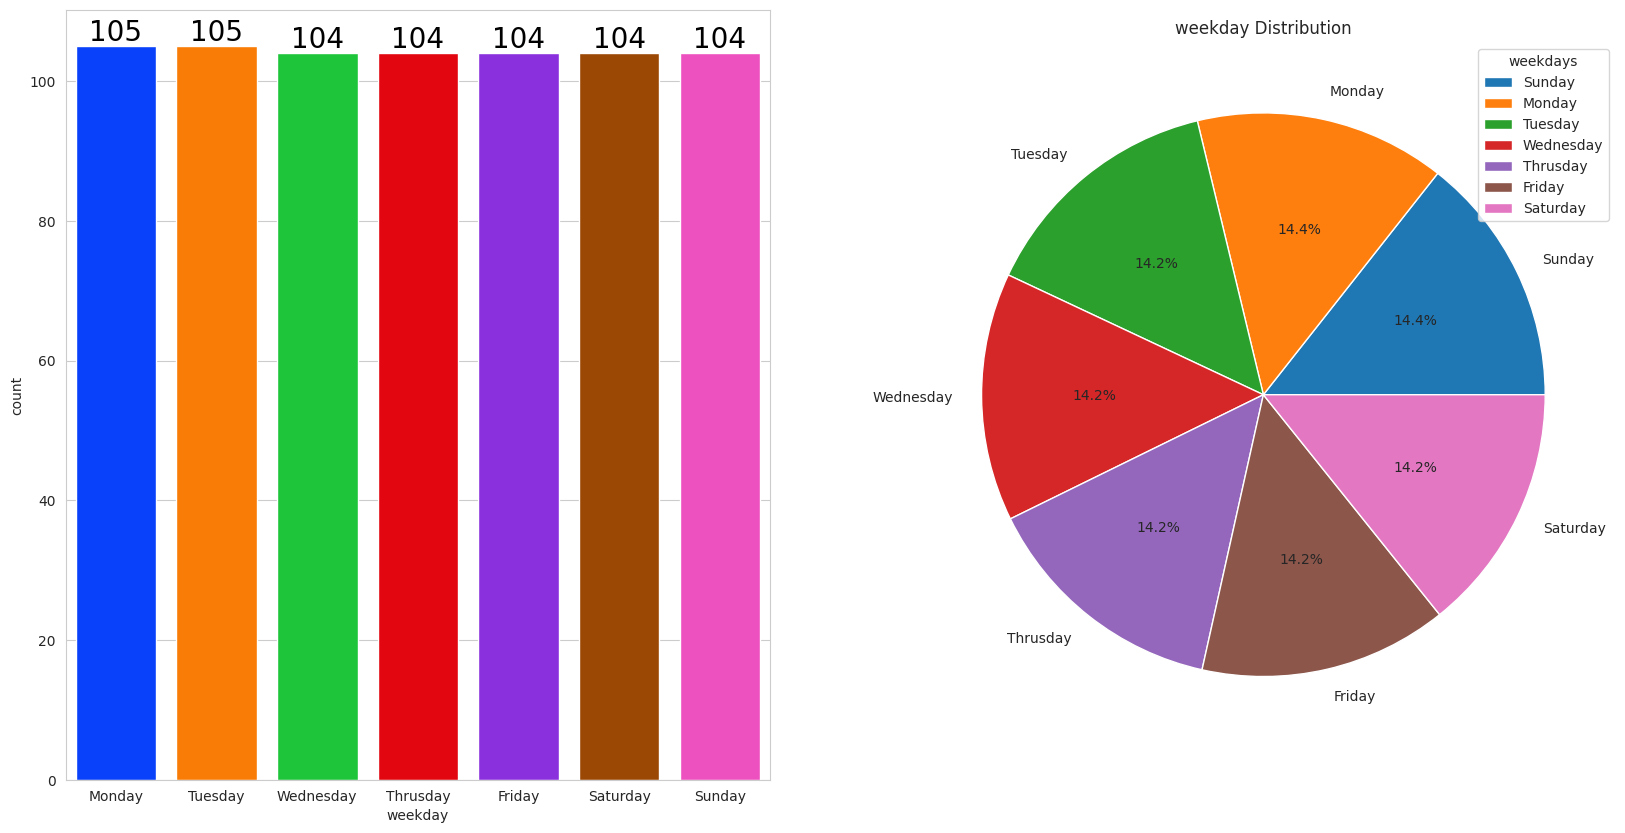

In [452]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=bike['weekday'],data=bike,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    


weekday_name ={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',
                 5:'Friday',6:'Saturday'}
weekday_counts = bike['weekday'].value_counts()
all_weekday = pd.Series(weekday_counts.values, index=weekday_name.values()).fillna(0)
plt.pie(all_weekday, labels=all_weekday.index, autopct='%1.1f%%')
plt.title('weekday Distribution')
plt.legend(title='weekdays', loc='upper right')
plt.show(block=False)

In [453]:
#workingday

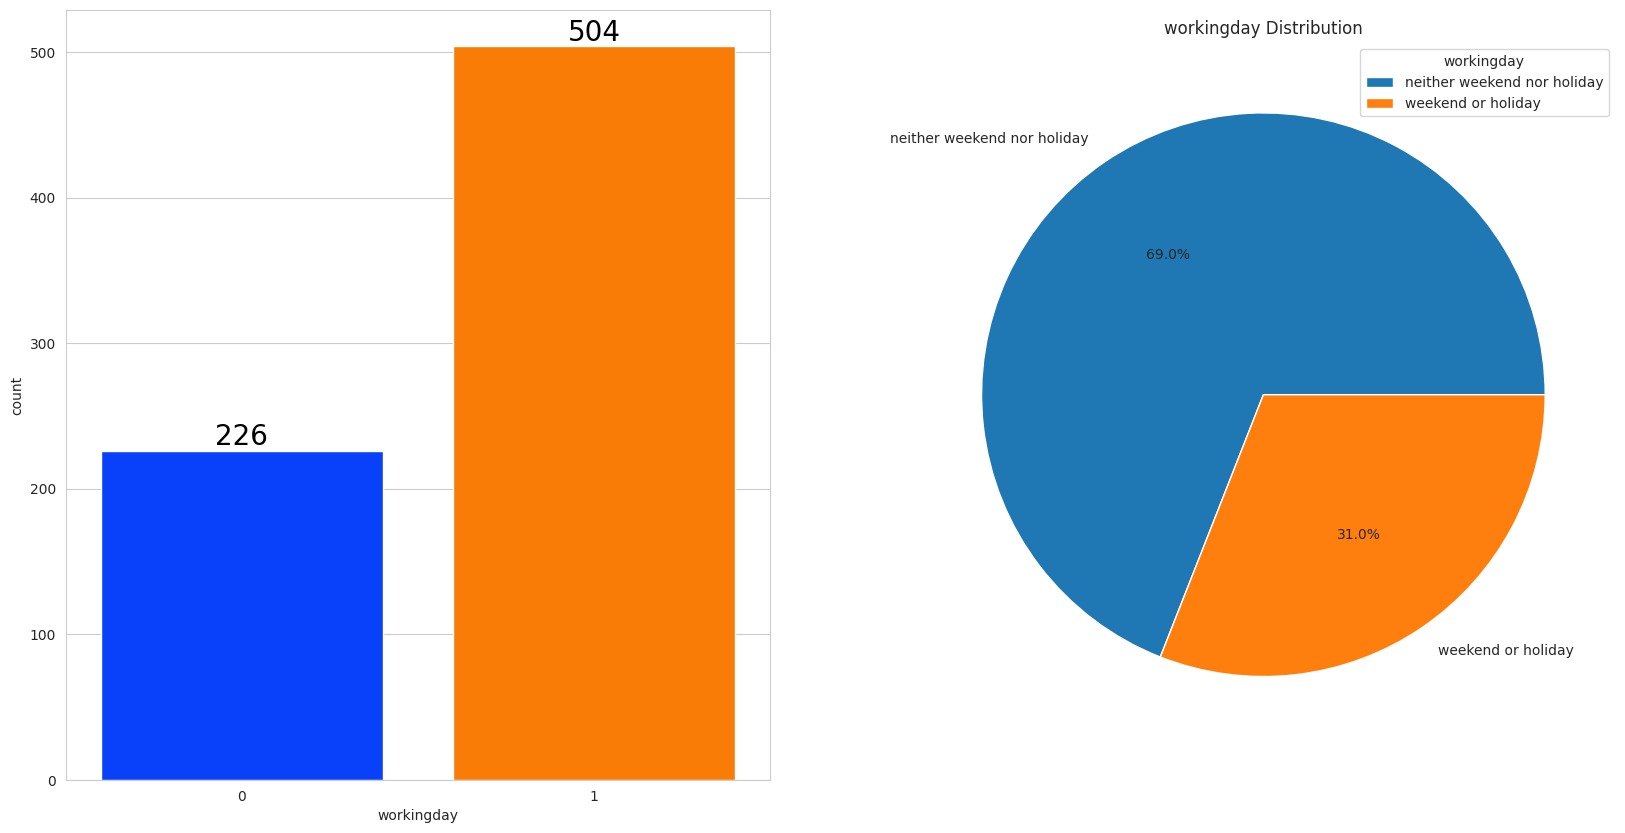

In [454]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=bike['workingday'],data=bike,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

workingday_name = {0: 'weekend or holiday',1 : 'neither weekend nor holiday'}
workingday_counts = bike['workingday'].value_counts()
workingday_counts.index = workingday_counts.index.map(workingday_name)
plt.pie(workingday_counts, labels=workingday_counts.index, autopct='%1.1f%%')
plt.title('workingday Distribution')
plt.legend(title='workingday', loc='upper right')
plt.show(block=False)

In [455]:
bike['weathersit'].value_counts()

clear+partly cloudy    463
mist+cloudy            246
light+rain+snow         21
Name: weathersit, dtype: int64

In [456]:
#weathersit

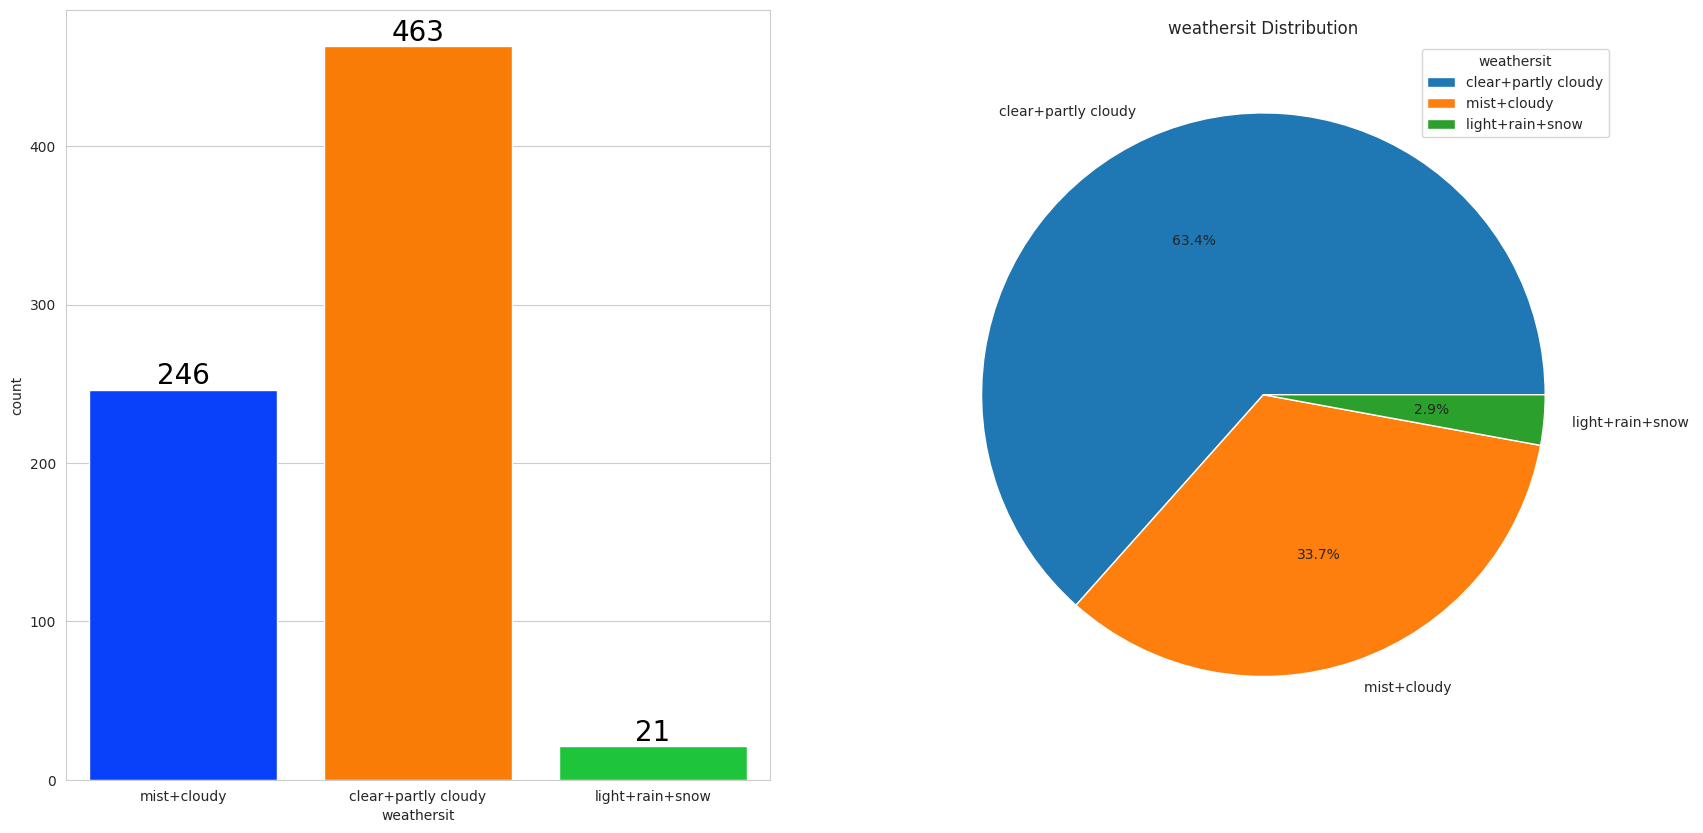

In [457]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=bike['weathersit'],data=bike,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

weathersit_name = {1:'clear+partly cloudy',2:'mist+cloudy ',3:'light+rain+snow '}
weathersit_counts = bike['weathersit'].value_counts()
all_weathersit = pd.Series(weathersit_counts.values, index=weathersit_name.values()).fillna(0)
plt.pie(all_weathersit, labels=all_weathersit.index, autopct='%1.1f%%')
plt.title('weathersit Distribution')
plt.legend(title='weathersit', loc='upper right')
plt.show(block=False)

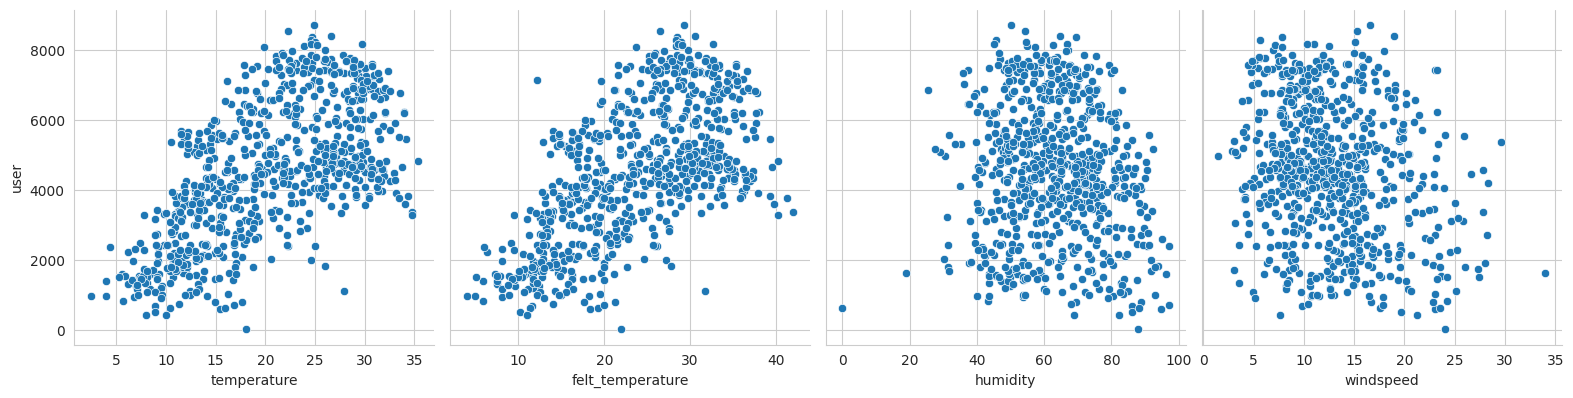

In [458]:
sns.pairplot(bike, x_vars=['temperature','felt_temperature','humidity','windspeed'], y_vars='user',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

In [459]:
#write insight here

## correlation

In [460]:
bike.corr()

,temperature,felt_temperature,humidity,windspeed,user
temperature,1.000000,0.991696,0.128565,-0.158186,0.627044
felt_temperature,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
user,0.627044,0.630685,-0.098543,-0.235132,1.000000


<Axes: >

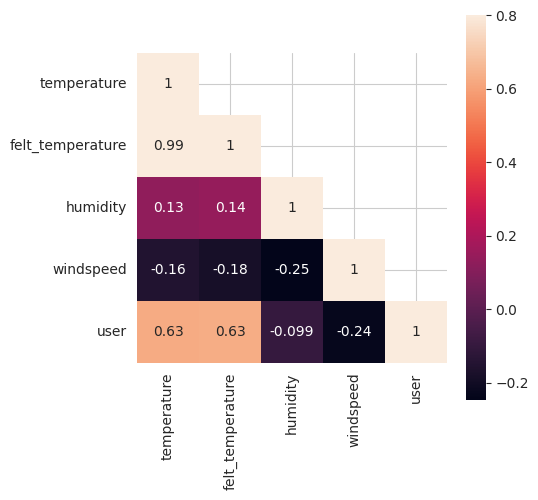

In [461]:
# plotting heatmap to visualize better
mask = np.array(bike.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(bike.corr(), mask=mask,vmax=.8, square=True,annot=True)

In [462]:
#write insight


In [463]:
#dealing with multi colinearity

we see here temperature and felt_temperature are highly correlated so we drop the felt_temperature column

In [464]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,felt_temperature,humidity,windspeed,user
0,spring,0,Jan,0,Monday,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear+partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrusday,1,clear+partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear+partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [465]:
bike.drop('felt_temperature',axis=1,inplace=True)

In [466]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,user
0,spring,0,Jan,0,Monday,1,mist+cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist+cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear+partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrusday,1,clear+partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear+partly cloudy,9.305237,43.6957,12.522300,1600


In [467]:
#dealing with outliers

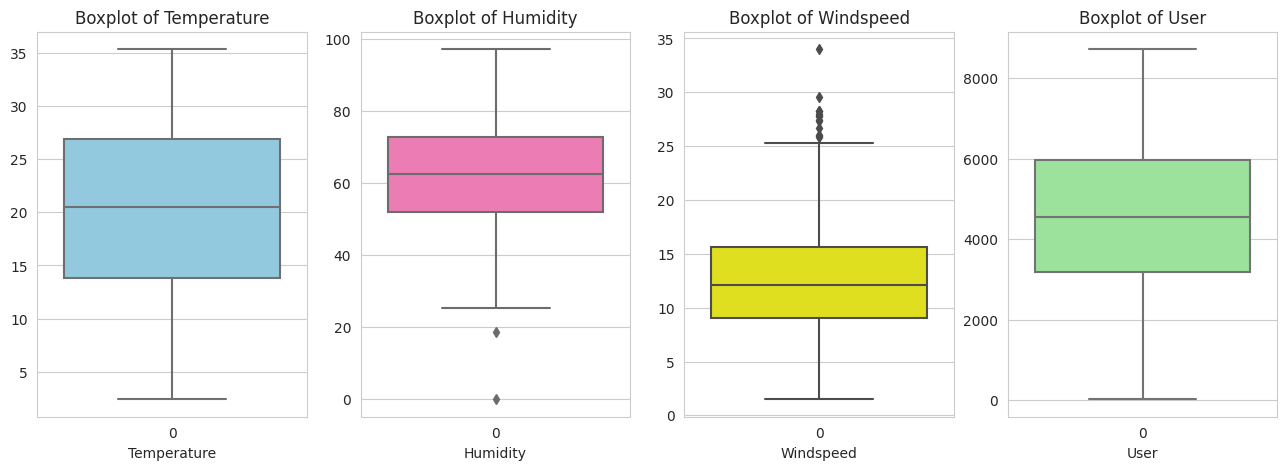

In [468]:
plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
sns.boxplot(bike['temperature'], color='skyblue')
plt.xlabel('Temperature')
plt.title('Boxplot of Temperature')

plt.subplot(142)
sns.boxplot(bike['humidity'], color='hotpink')
plt.xlabel('Humidity')
plt.title('Boxplot of Humidity')

plt.subplot(143)
sns.boxplot(bike['windspeed'], color='yellow')
plt.xlabel('Windspeed')
plt.title('Boxplot of Windspeed')

plt.subplot(144)
sns.boxplot(bike['user'], color='lightgreen')
plt.xlabel('User')
plt.title('Boxplot of User')

plt.show()

## Data Preparation
   - getting dummy variables(using 1 hot encoding)
   
   

In [469]:
bike.dtypes

season          object
year            object
month           object
holiday         object
weekday         object
workingday      object
weathersit      object
temperature    float64
humidity       float64
windspeed      float64
user             int64
dtype: object

In [470]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,user
0,spring,0,Jan,0,Monday,1,mist+cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist+cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear+partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrusday,1,clear+partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear+partly cloudy,9.305237,43.6957,12.522300,1600


In [471]:
# Subset all categorical variables
bike_categorical=bike.select_dtypes(include=['object'])

In [472]:
# Convert into dummies
bike_dummmies = pd.get_dummies(bike_categorical, drop_first=True)
bike_dummmies.head()

,season_spring,season_summer,season_winter,year_1,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_light+rain+snow,weathersit_mist+cloudy
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [473]:
# Drop categorical variable columns
bike = bike.drop(list(bike_categorical.columns), axis=1)

In [474]:
# Concatenate dummy variables with the original dataframe
bike = pd.concat([bike, bike_dummmies], axis=1)

In [475]:
bike.head()

,temperature,humidity,windspeed,user,season_spring,season_summer,season_winter,year_1,month_Aug,month_Dec,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_light+rain+snow,weathersit_mist+cloudy
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [476]:
bike.shape

(730, 29)

In [477]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperature                 730 non-null    float64
 1   humidity                    730 non-null    float64
 2   windspeed                   730 non-null    float64
 3   user                        730 non-null    int64  
 4   season_spring               730 non-null    uint8  
 5   season_summer               730 non-null    uint8  
 6   season_winter               730 non-null    uint8  
 7   year_1                      730 non-null    uint8  
 8   month_Aug                   730 non-null    uint8  
 9   month_Dec                   730 non-null    uint8  
 10  month_Feb                   730 non-null    uint8  
 11  month_Jan                   730 non-null    uint8  
 12  month_July                  730 non-null    uint8  
 13  month_June                  730 non

In [478]:
# Split the dataset into features and target variable
X = bike.drop(['user'], axis=1)
y = bike['user']


In [479]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [480]:
# Data Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [481]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

# Model Building

In [482]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,  ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [483]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    Lasso(),
    Ridge(),
    ElasticNet(),
   
]
scalers = [('StandardScaler', X_train_scaled, X_test_scaled), ('MinMaxScaler', X_train_minmax, X_test_minmax)]

In [484]:
#finding the best model
best_model = None
best_rmse = float('inf')
best_scaler_name = None
best_r2 = float('-inf')  # Variable to store the best R-squared value

for model in models:
    for scaler_name, X_train_scaled, X_test_scaled in scalers:
        print(f"Model: {model.__class__.__name__}, Scaler: {scaler_name}")
        rfe = RFE(model, n_features_to_select=10)
        rfe.fit(X_train_scaled, y_train)
        y_train_pred = rfe.predict(X_train_scaled)
        y_test_pred = rfe.predict(X_test_scaled)

        n = X_train_scaled.shape[0]  # number of samples
        p = X_train_scaled.shape[1]  # number of features

        adj_r2_train = 1 - ((1 - r2_score(y_train, y_train_pred)) * (n - 1)) / (n - p - 1)
        adj_r2_test = 1 - ((1 - r2_score(y_test, y_test_pred)) * (n - 1)) / (n - p - 1)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        print("Train RMSE: {:.3f}".format(rmse_train))
        print("Test RMSE: {:.3f}".format(rmse_test))
        print("Train R2: {:.3f}".format(r2_score(y_train, y_train_pred)))
        print("Train Adjusted R2: {:.3f}".format(adj_r2_train))
        print("Test R2: {:.3f}".format(r2_score(y_test, y_test_pred)))
        print("Test Adjusted R2: {:.3f}".format(adj_r2_test))
        print("=" * 80)

        if rmse_test < best_rmse:
            best_model = model
            best_rmse = rmse_test
            best_scaler_name = scaler_name
            best_r2 = r2_score(y_test, y_test_pred)  # Update the best R-squared value

print("Best model: {}".format(best_model.__class__.__name__))
print("Best Scaler: {}".format(best_scaler_name))
print("Best RMSE: {:.3f}".format(best_rmse))
print("Best R2: {:.3f}".format(best_r2))


Model: LinearRegression, Scaler: StandardScaler
Train RMSE: 803.979
Test RMSE: 832.055
Train R2: 0.818
Train Adjusted R2: 0.807
Test R2: 0.835
Test Adjusted R2: 0.825
Model: LinearRegression, Scaler: MinMaxScaler
Train RMSE: 807.597
Test RMSE: 845.160
Train R2: 0.816
Train Adjusted R2: 0.806
Test R2: 0.830
Test Adjusted R2: 0.820
Model: DecisionTreeRegressor, Scaler: StandardScaler
Train RMSE: 0.000
Test RMSE: 980.342
Train R2: 1.000
Train Adjusted R2: 1.000
Test R2: 0.771
Test Adjusted R2: 0.758
Model: DecisionTreeRegressor, Scaler: MinMaxScaler
Train RMSE: 0.000
Test RMSE: 1028.017
Train R2: 1.000
Train Adjusted R2: 1.000
Test R2: 0.748
Test Adjusted R2: 0.733
Model: RandomForestRegressor, Scaler: StandardScaler
Train RMSE: 261.032
Test RMSE: 767.535
Train R2: 0.981
Train Adjusted R2: 0.980
Test R2: 0.860
Test Adjusted R2: 0.851
Model: RandomForestRegressor, Scaler: MinMaxScaler
Train RMSE: 264.357
Test RMSE: 777.779
Train R2: 0.980
Train Adjusted R2: 0.979
Test R2: 0.856
Test Adjust

In [485]:
 # the model with the lowest test RMSE and highest test R2 is the RandomForestRegressor with StandardScalar


In [486]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

scaler_name = 'StandardScaler'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor()

print(f"Model: {model.__class__.__name__}, Scaler: {scaler_name}")
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
y_train_pred = rfe.predict(X_train_scaled)
y_test_pred = rfe.predict(X_test_scaled)

n = X_train_scaled.shape[0]  # number of samples
p = X_train_scaled.shape[1]  # number of features

adj_r2_train = 1 - ((1 - r2_score(y_train, y_train_pred)) * (n - 1)) / (n - p - 1)
adj_r2_test = 1 - ((1 - r2_score(y_test, y_test_pred)) * (n - 1)) / (n - p - 1)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train RMSE: {:.3f}".format(rmse_train))
print("Test RMSE: {:.3f}".format(rmse_test))
print("Train R2: {:.3f}".format(r2_score(y_train, y_train_pred)))
print("Train Adjusted R2: {:.3f}".format(adj_r2_train))
print("Test R2: {:.3f}".format(r2_score(y_test, y_test_pred)))
print("Test Adjusted R2: {:.3f}".format(adj_r2_test))

Model: RandomForestRegressor, Scaler: StandardScaler
Train RMSE: 267.358
Test RMSE: 776.486
Train R2: 0.980
Train Adjusted R2: 0.979
Test R2: 0.856
Test Adjusted R2: 0.848


In [487]:

# Fit the model
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [488]:
# Test the model
y_pred_test = model.predict(X_test_scaled)

In [489]:
# Evaluate the model on test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("Test RMSE: {:.3f}".format(rmse_test))
print("Test R2: {:.3f}".format(r2_test))

# Perform cross-validation for validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print("Cross-Validation RMSE: {:.3f} (+/- {:.3f})".format(cv_rmse_scores.mean(), cv_rmse_scores.std()))
print("Cross-Validation R2: {:.3f} (+/- {:.3f})".format(cv_r2_scores.mean(), cv_r2_scores.std()))

Test RMSE: 769.465
Test R2: 0.859
Cross-Validation RMSE: 720.586 (+/- 116.014)
Cross-Validation R2: 0.854 (+/- 0.033)


In [490]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Residual Analysis

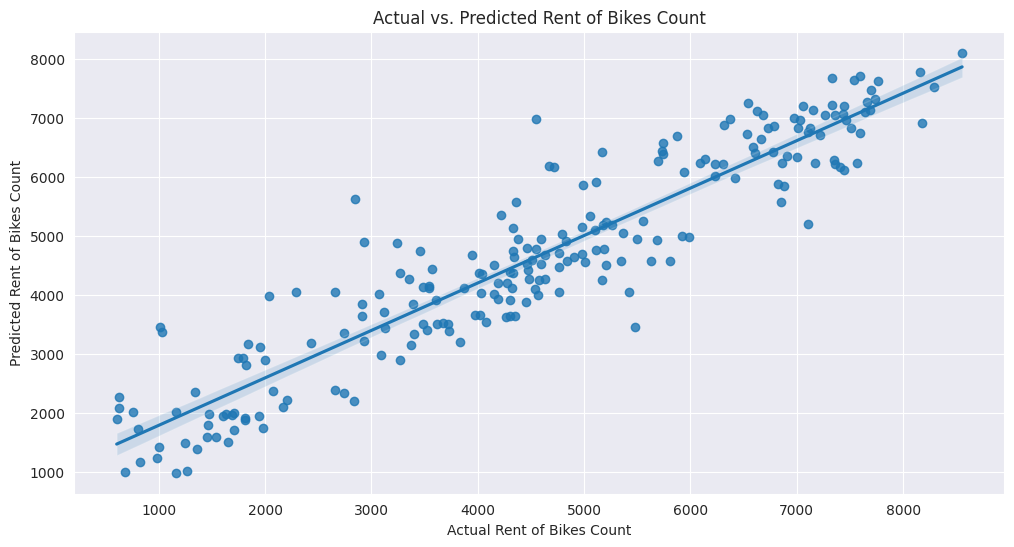

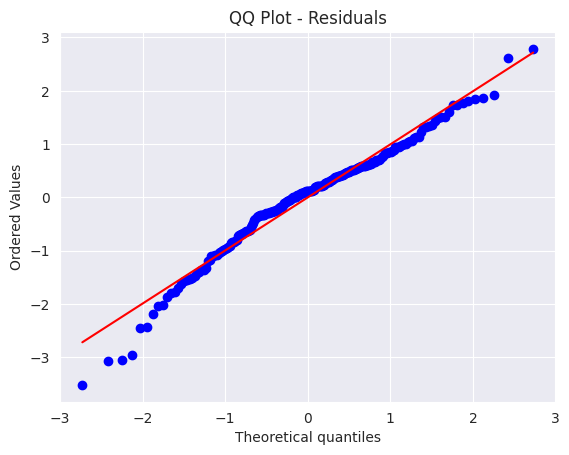

In [492]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_pred_test)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

# QQ plot of residuals
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)
stats.probplot(residuals_standardized, dist="norm", plot=plt)
plt.title('QQ Plot - Residuals')
plt.show()

In [493]:
# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

In [494]:
# Evaluate the performance
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Set Evaluation:")
print("Mean Squared Error (MSE): {:.3f}".format(mse_test))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse_test))
print("R-squared (R2): {:.3f}".format(r2_test))

Test Set Evaluation:
Mean Squared Error (MSE): 592076.590
Root Mean Squared Error (RMSE): 769.465
R-squared (R2): 0.859
